# 도표 시각화

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import font_manager, rc

In [2]:
# 한글 깨짐 방지 코드
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 월별 통합 데이터 = df
df = pd.read_csv('../데이터전처리/pre_data/월별_통합.csv',index_col=0)
df = df[['date','닭고기가격','병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축', '소_소비자가_int','돼지_소비자가_int']]
df.fillna(0, inplace=True) # null값을 0으로 채움
df.head()

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
0,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873,59981,18465
1,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873,59981,18465
2,2012-02-29,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879,56019,16634
3,2012-03-31,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750,50899,16317
4,2012-04-30,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940,53879,15882


In [4]:
# 일별 통합 데이터 = data
data = pd.read_csv('../데이터전처리/pre_data/일별_통합.csv',index_col=0)
data = data[['date','price','병아리(원/수)', 'oil_avg', '일별_평균기온', '소_소비자가_int', '돼지_소비자가_int', '미국기준금리', '한국기준금리']]
data.fillna(method='bfill',inplace=True) # 일별 데이터 data에서 유가 null 값을 null 뒤에 값으로 채움
data

,date,price,병아리(원/수),oil_avg,일별_평균기온,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,2021-12-31,4047,400.0,76.703333,-3.9,111396.0,25177.0,0.25,1.00
1,2021-12-30,4047,400.0,77.850000,-0.7,111396.0,25411.0,0.25,1.00
2,2021-12-29,3895,400.0,77.566667,2.5,112019.0,26891.0,0.25,1.00
3,2021-12-28,3895,400.0,77.130000,0.0,110865.0,26936.0,0.25,1.00
4,2021-12-27,3743,400.0,76.530000,-4.6,109225.0,26993.0,0.25,1.00
...,...,...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200.0,108.180000,-2.6,58380.0,19570.0,0.75,3.25
2992,2012-01-05,3118,200.0,108.260000,-4.1,58870.0,19830.0,0.75,3.25
2993,2012-01-04,3118,300.0,108.470000,-4.0,61700.0,20300.0,0.75,3.25
2994,2012-01-03,3118,300.0,107.000000,-1.9,61030.0,20330.0,0.75,3.25


In [6]:
df.describe()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,3267.139344,360.713115,12.751639,1.090164,0.459016,9823.409836,463.996721,69.379830,603.590164,79310.573770,77601.516393,19542.877049
std,434.789439,189.860909,9.274200,3.012382,1.186338,2312.725149,42.251085,24.659065,148.206454,13620.253518,14731.791762,2825.735123
min,2457.000000,100.000000,-2.500000,0.000000,0.000000,4102.000000,414.000000,21.241587,272.000000,47742.000000,50899.000000,12918.000000
25%,2938.000000,203.000000,3.900000,0.000000,0.000000,8376.500000,427.075000,50.104855,493.500000,70134.750000,63709.000000,17991.000000
50%,3218.000000,320.000000,13.400000,0.000000,0.000000,9775.000000,441.450000,62.704316,618.500000,80270.500000,78637.000000,19181.000000
75%,3571.500000,500.000000,21.375000,0.000000,0.000000,11417.500000,502.275000,98.439053,713.000000,87016.000000,84043.500000,21295.500000
max,4456.000000,860.000000,27.100000,16.000000,6.000000,16777.000000,548.800000,117.745606,898.000000,118942.000000,110791.000000,27036.000000


In [7]:
data.describe()

,price,병아리(원/수),oil_avg,일별_평균기온,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
count,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000
mean,3273.932243,360.914553,69.413413,13.167089,77544.849132,19551.027036,0.761348,1.673314
std,501.571001,202.944184,24.370848,9.626387,15049.085885,3105.463488,0.753343,0.771399
min,2067.000000,100.000000,2.906667,-12.300000,0.000000,0.000000,0.250000,0.500000
25%,2927.000000,200.000000,50.292500,4.800000,64420.250000,17692.000000,0.250000,1.250000
50%,3279.000000,300.000000,62.918333,13.600000,78525.500000,19287.000000,0.250000,1.500000
75%,3590.000000,500.000000,97.880833,21.700000,84255.500000,21491.000000,1.250000,2.500000
max,4657.000000,900.000000,119.246667,30.300000,113196.000000,28277.000000,2.500000,3.250000


#### 닭고기가격 분포 확인

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='닭고기가격'>

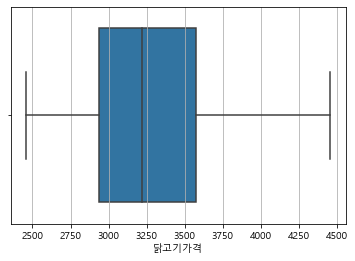

In [8]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True
sns.boxplot(df['닭고기가격'])

# 타겟변수인 닭고기 가격의 분산이 작은 것이 확인 가능함

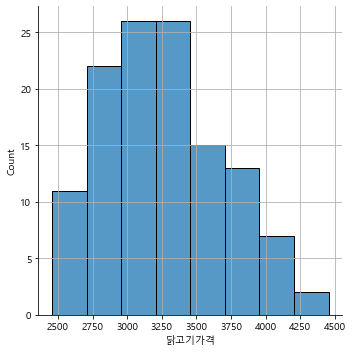

In [9]:
sns.displot(df['닭고기가격'])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='닭고기가격', ylabel='Density'>

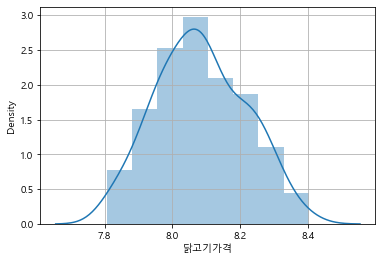

In [10]:
# 위의 그래프를 비교해보면 닭고기가격에 log를 취해주면 기존보다 더 정규분포에 가까워 진 것을 확인 할 수 있음.

f, ax = plt.subplots()

sns.distplot(np.log1p(df['닭고기가격']))


#### 변수 분포 확인

IndexError: list index out of range

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


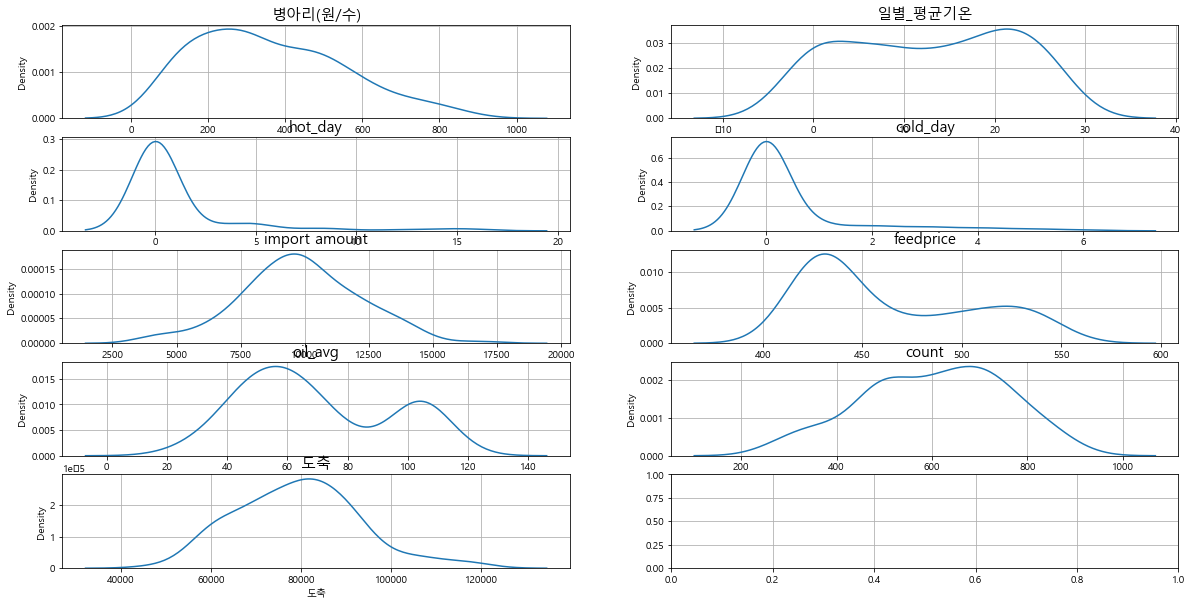

In [11]:
# 월별 원본 데이터로 분포 확인

fig, ax = plt.subplots(5, 2, figsize=(20,10))
count = 0
columns = ['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']

for row in range(5):
    for col in range(2):
        sns.kdeplot(df[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1

C:\Users\admin\AppData\Local\Temp\ipykernel_16212\1977927680.py:7: RuntimeWarning: invalid value encountered in log1p
  data_log[c] = np.log1p(data_log[c].values)


IndexError: list index out of range

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


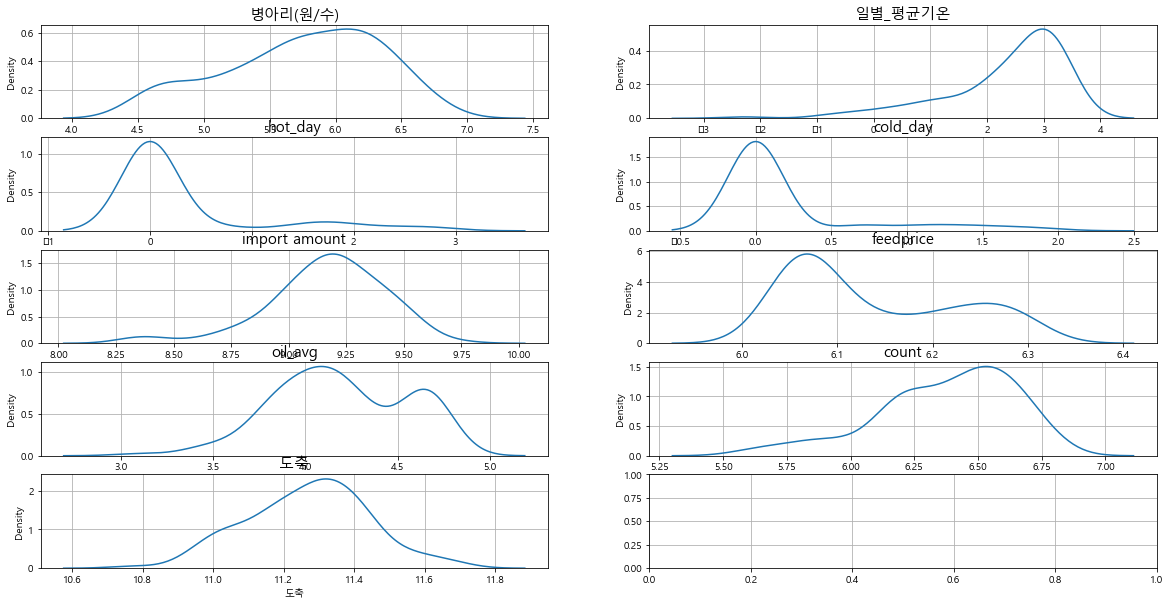

In [ ]:
# 월별 데이터 정규화해서 분포 확인

data_log = df.copy()
skew_columns = ['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']

for c in skew_columns:
    data_log[c] = np.log1p(data_log[c].values)

fig, ax = plt.subplots(5, 2, figsize=(20, 10))

count = 0
for row in range(5):
    for col in range(2):
        sns.kdeplot(data_log[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1
        
plt.tight_layout()

In [ ]:
# 월별 통합 데이터 정규화

data_log['닭고기가격'] = np.log1p(df['닭고기가격'])
data_log

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,8.071843,5.525453,NaN,0.000000,1.609438,9.077380,6.281519,4.682743,5.877736,10.983155
1,2012-02-29,8.207674,6.042633,NaN,0.000000,1.386294,9.220192,6.274574,4.732131,6.511745,10.930962
2,2012-03-31,8.335671,6.216606,1.856298,0.000000,0.000000,9.290721,6.270799,4.776983,6.769642,10.981063
3,2012-04-30,8.131531,5.808142,2.595255,0.000000,0.000000,9.503980,6.267770,4.742526,6.577861,11.017661
4,2012-05-31,8.088255,5.303305,2.949688,0.000000,0.000000,9.583282,6.267580,4.655718,6.208590,11.205122
...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,8.162231,5.746203,3.250374,1.386294,0.000000,9.144307,6.200509,4.252031,6.508769,11.406375
116,2021-09-30,8.031060,6.013715,3.104587,0.000000,0.000000,9.106090,6.222576,4.303729,6.173786,11.302538
117,2021-10-31,8.272315,6.104793,2.778819,0.000000,0.000000,9.393162,6.232448,4.421167,6.383507,11.305028
118,2021-11-30,8.001690,5.755742,2.230014,0.000000,0.000000,9.212937,6.255750,4.392703,6.481577,11.371592


In [ ]:
data_raw=df.copy()
data_raw

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879
2,2012-03-31,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750
3,2012-04-30,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940
4,2012-05-31,3255,200,18.1,0.0,0.0,14519,526.2,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,24.8,3.0,0.0,9360,492.0,69.247955,670,89892
116,2021-09-30,3074,408,21.3,0.0,0.0,9009,503.0,72.975152,479,81026
117,2021-10-31,3913,447,15.1,0.0,0.0,12005,508.0,82.193333,591,81228
118,2021-11-30,2985,315,8.3,0.0,0.0,10025,520.0,79.858712,652,86819


### 닭고기가격 - 병아리 가격 분포 확인

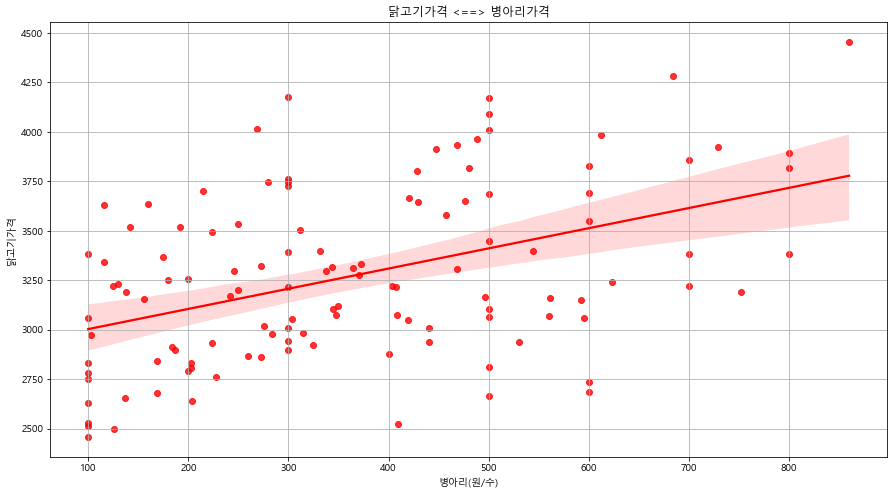

In [ ]:
# 원본 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['병아리(원/수)']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 병아리가격")
fig = sns.regplot(x='병아리(원/수)', y="닭고기가격", data=raw_data, color="r")

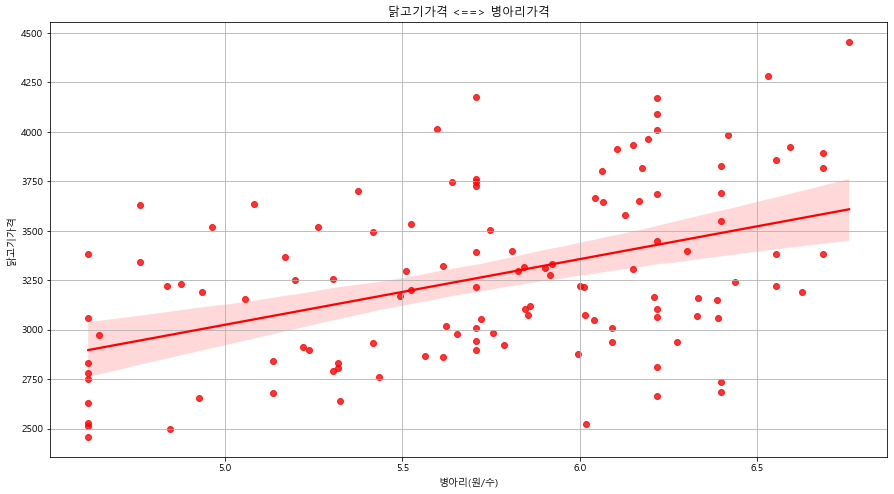

In [ ]:
# 정규화한 데이터 분포 확인
raw_data = pd.concat([data_log['닭고기가격'], data_log['병아리(원/수)']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 병아리가격")
fig = sns.regplot(x='병아리(원/수)', y="닭고기가격", data=raw_data, color="r")

### 닭고기가격 - 월별 평균기온 분포 확인

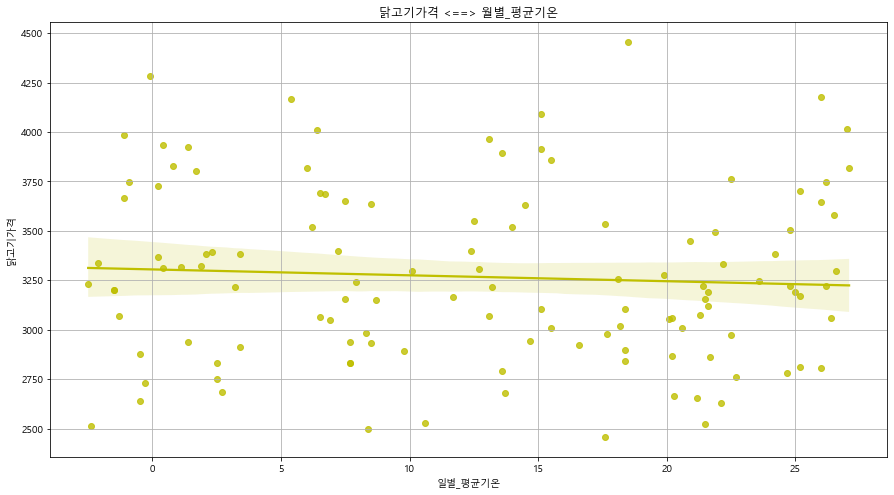

In [25]:
# 원본 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.regplot(x='일별_평균기온', y="닭고기가격", data=raw_data, color="y")

In [26]:
# 정규화 데이터 분포 확인
raw_data = pd.concat([data_log['닭고기가격'], data_log['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.regplot(x='일별_평균기온', y="닭고기가격", data=raw_data, color="y")

NameError: name 'data_log' is not defined

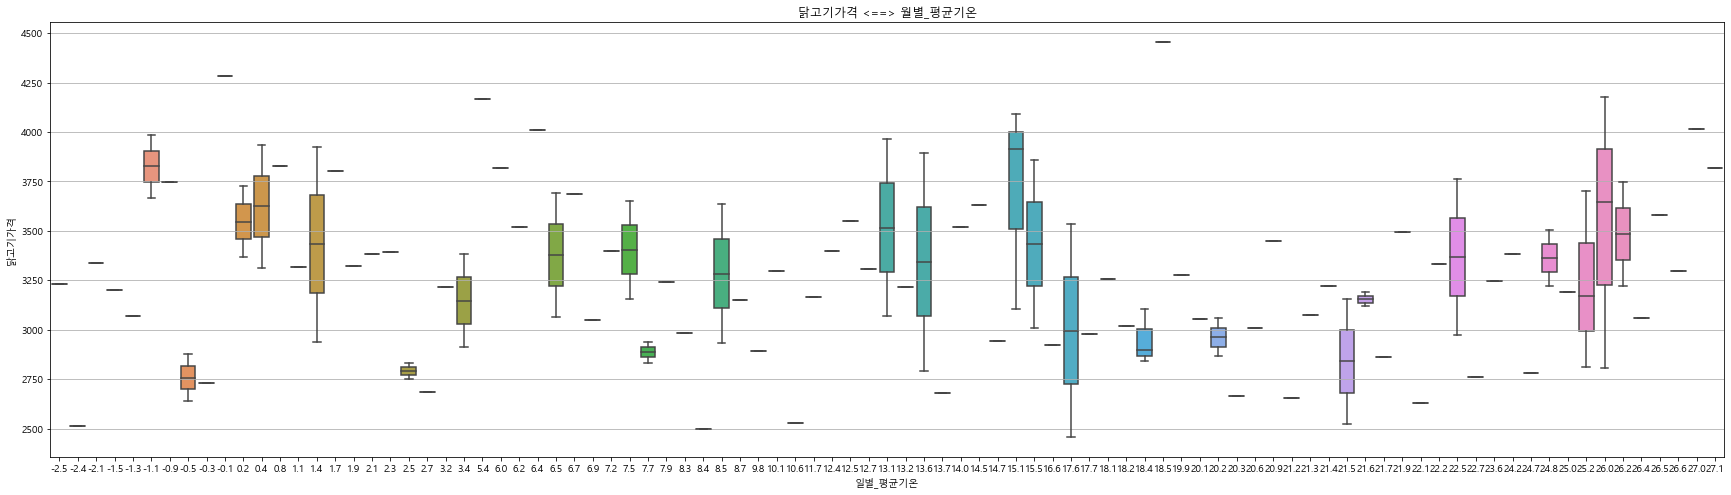

In [ ]:
# boxplot으로 원본 닭고기가격 - 월별 평균 기온 데이터 시각화

raw_data = pd.concat([df['닭고기가격'], df['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
plt.title("닭고기가격 <==> 월별_평균기온")
fig = sns.boxplot(x='일별_평균기온', y="닭고기가격", data=raw_data)

In [27]:
# 정규화한 닭고기가격 - 월별 평균기온 데이터 분포 확인

raw_data = pd.concat([data_log['닭고기가격'], data_log['일별_평균기온']], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
plt.title("닭고기가격 <==> 일별_평균기온")
fig = sns.boxplot(x='일별_평균기온', y="닭고기가격", data=raw_data)

NameError: name 'data_log' is not defined

### 닭고기 가격 - 수입량 분포 확인

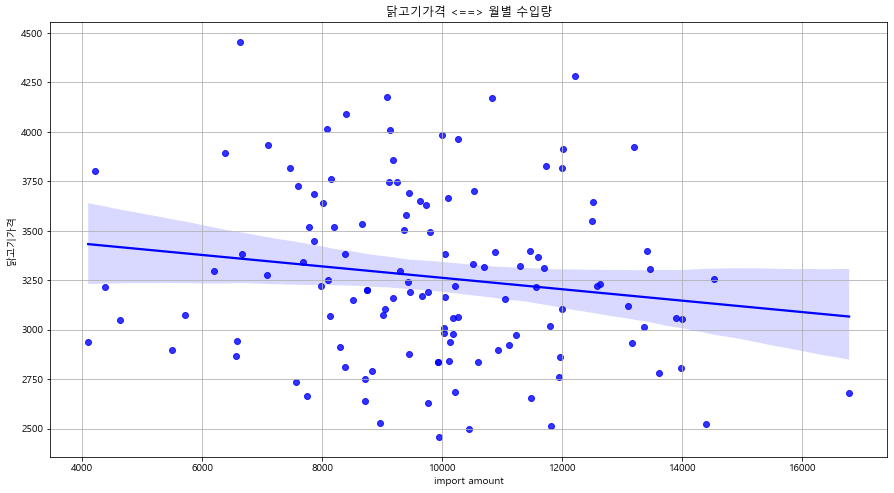

In [28]:
# 원본 데이터 분포 확인

raw_data = pd.concat([df['닭고기가격'], df['import amount']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별 수입량")
fig = sns.regplot(x='import amount', y="닭고기가격", data=raw_data, color="b")

In [29]:
# 정규화한 데이터 분포 확인

raw_data = pd.concat([data_log['닭고기가격'], data_log['import amount']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 월별 수입량")
fig = sns.regplot(x='import amount', y="닭고기가격", data=raw_data, color="b")

NameError: name 'data_log' is not defined

### 닭고기가격 - 폭염/한파 데이터 분포 확인

Text(0, 0.5, '닭고기가격')

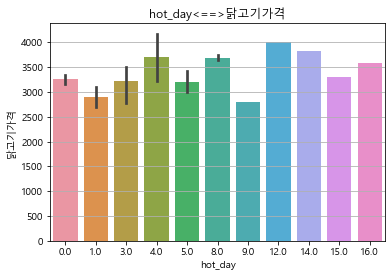

In [30]:
ax = plt.subplots() 
ax = sns.barplot(x='hot_day', y='닭고기가격', data=df) 
ax.set_title('hot_day<==>닭고기가격') 
ax.set_xlabel('hot_day') 
ax.set_ylabel('닭고기가격')

In [31]:
df.groupby("hot_day").mean()

,닭고기가격,병아리(원/수),일별_평균기온,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
hot_day,,,,,,,,,,,
0.0,3258.540000,377.520000,10.080000,0.56,9662.430000,463.817000,69.411583,599.530000,75852.82,77658.540000,19149.510000
1.0,2899.250000,339.000000,21.150000,0.00,10740.500000,451.050000,66.044857,645.500000,89754.75,79869.500000,21442.250000
3.0,3224.000000,170.666667,24.566667,0.00,11006.333333,463.933333,61.805357,734.666667,108118.00,83911.000000,22544.000000
4.0,3700.000000,212.500000,25.400000,0.00,10836.500000,522.650000,105.378043,499.000000,98965.00,55964.000000,18673.000000
5.0,3193.166667,266.333333,25.533333,0.00,10033.166667,454.116667,54.883136,545.000000,95792.50,78511.166667,22153.333333
8.0,3695.500000,354.500000,26.100000,0.00,10809.500000,500.750000,89.184397,529.000000,88882.50,81242.000000,21783.500000
9.0,2808.000000,203.000000,26.000000,0.00,13977.000000,430.000000,57.768485,718.000000,97472.00,82585.000000,18915.000000
12.0,4015.000000,269.000000,27.000000,0.00,8084.000000,538.400000,107.920606,775.000000,75362.00,62885.000000,18299.000000
14.0,3819.000000,480.000000,27.100000,0.00,11990.000000,431.600000,71.377391,754.000000,86408.00,79652.000000,22007.000000


Text(0, 0.5, '닭고기가격')

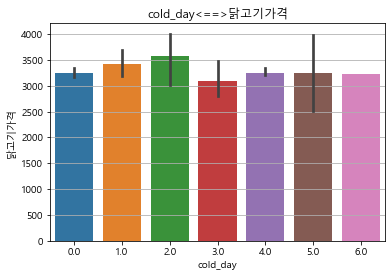

In [32]:
ax = plt.subplots() 
ax = sns.barplot(x='cold_day', y='닭고기가격', data=df) 
ax.set_title('cold_day<==>닭고기가격') 
ax.set_xlabel('cold_day') 
ax.set_ylabel('닭고기가격')

In [33]:
df.groupby("cold_day").mean()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
cold_day,,,,,,,,,,,
0.0,3251.069307,362.653465,15.49604,1.316832,9901.326733,462.463366,68.455158,635.29703,81217.950495,78174.356436,19794.871287
1.0,3424.666667,365.000000,0.90000,0.000000,8745.666667,481.233333,68.973336,471.00000,72622.333333,79494.333333,19467.166667
2.0,3572.200000,392.600000,-0.10000,0.000000,10699.400000,454.420000,67.116465,460.20000,74905.200000,75061.200000,18102.000000
3.0,3087.500000,442.000000,-0.80000,0.000000,8206.500000,451.950000,65.030050,470.25000,66244.750000,73479.500000,18079.500000
4.0,3248.000000,205.333333,-1.70000,0.000000,8397.333333,523.300000,105.126769,328.00000,60001.333333,60318.000000,17284.000000
5.0,3249.000000,356.000000,-1.75000,0.000000,10906.000000,418.600000,60.204136,583.00000,78608.500000,91386.000000,19483.000000
6.0,3232.000000,130.000000,-2.50000,0.000000,12621.000000,524.400000,105.037273,315.00000,60417.000000,61859.000000,14500.000000


### 닭고기가격 - 사료값 데이터 분포 확인

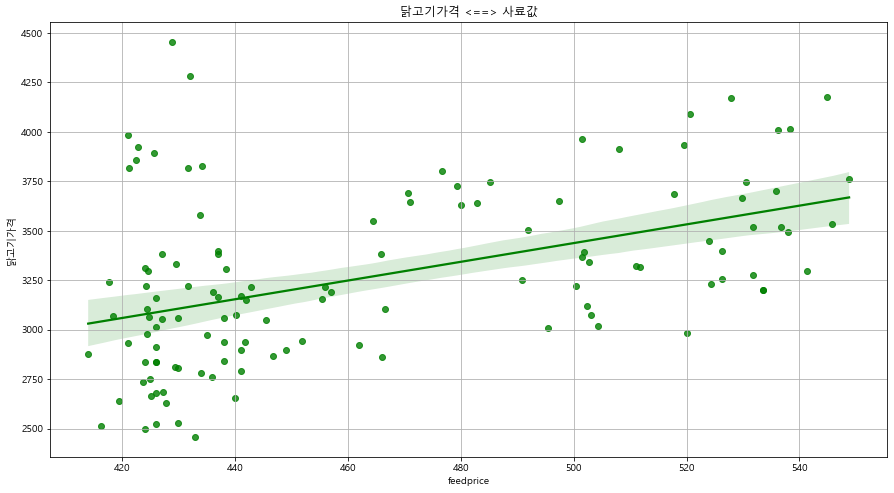

In [34]:
# 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['feedprice']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 사료값")
fig = sns.regplot(x='feedprice', y="닭고기가격", data=raw_data, color="g")

### 닭고기가격 - 유가 데이터 분포 확인

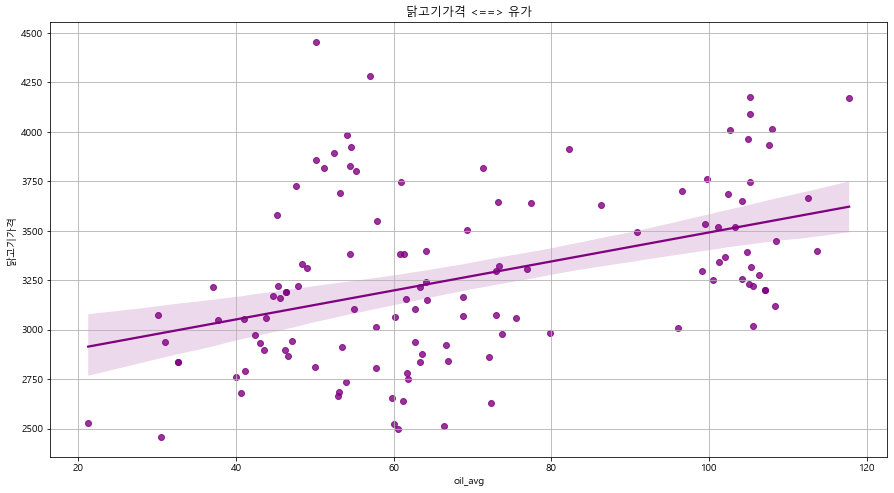

In [35]:
# 데이터 분포 확인
raw_data = pd.concat([df['닭고기가격'], df['oil_avg']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
plt.title("닭고기가격 <==> 유가")
fig = sns.regplot(x='oil_avg', y="닭고기가격", data=raw_data, color="purple")

### Linear Rgression

In [20]:
# Linear Regression

from sklearn.linear_model import LinearRegression

X = df['병아리(원/수)']
y = df['닭고기가격']

line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1),y)


LinearRegression()

In [21]:
y_predicted = line_fitter.predict([[450]])
y_predicted

array([3359.02298854])

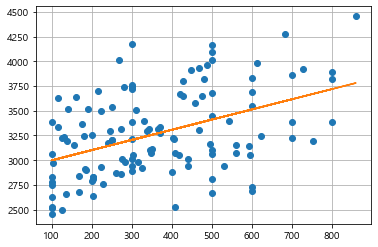

In [22]:
plt.plot(X,y,'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

Epoch 1/20
122/122 [==============================] - 0s 800us/step - loss: nan - accuracy: 0.0000e+00   
Epoch 2/20
122/122 [==============================] - 0s 991us/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/20
122/122 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/20
122/122 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/20
122/122 [==============================] - 0s 748us/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/20
122/122 [==============================] - 0s 894us/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/20
122/122 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/20
122/122 [==============================] - 0s 797us/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/20
122/122 [==============================] - 0s 692us/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/20
122/122 [==============================] - 0s 967us/step - loss:

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


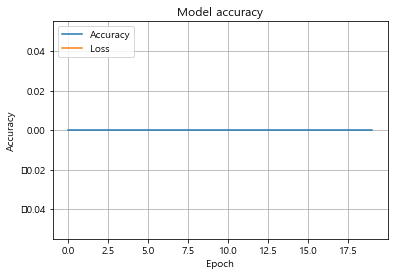

In [23]:
# 튜닝하는 것인데, 형식이 안맞아서인지 뭔지 때문에 학습이 안됨
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# data set
x_data = df[['병아리(원/수)']]
y_data = df[['닭고기가격']]

# model: linear regression input dense with dim =1
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

# model compile:  SGD learning_rate of 0.01 
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(loss='mse',optimizer=sgd, metrics=['accuracy'])

# model fit
history = model.fit(x_data.values.reshape(-1,1), y_data, epochs=20, batch_size=1, shuffle=False, verbose=1)

# prediction
print (model.predict([500]))

# print model summary
model.summary()

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
#print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
# plt.savefig('tran_result.png')
#plt.show()


### 다중선형회귀분석(월별)

In [24]:
from sklearn.model_selection import train_test_split

# x = df[['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']]
x = df[['병아리(원/수)','oil_avg']]
y = df[['닭고기가격']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2)


In [25]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [26]:
pred = [[450,20,0,0,10000,500,110,500,73505]]
my_predict = mlr.predict(pred)
my_predict

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but LinearRegression is expecting 2 features as input.

In [ ]:
y_predict = mlr.predict(x_test)
y_predict

array([[3442.37725028],
       [3107.23672238],
       [2937.53288584],
       [3370.66883183],
       [3289.2751785 ],
       [2949.05704347],
       [3469.09771762],
       [3306.21963385],
       [3263.80723601],
       [2932.81412207],
       [3580.77083552],
       [3696.00635173],
       [3178.12492006],
       [3561.43209637],
       [2924.38016647],
       [2828.90990329],
       [2898.10933855],
       [3194.85367825],
       [3266.50257736],
       [3597.06271419],
       [3693.84165864],
       [3415.0367198 ],
       [3280.88251855],
       [3017.52843428],
       [3245.91401495]])

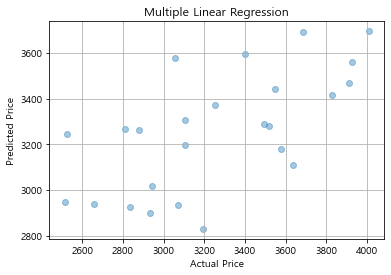

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

In [ ]:
mlr.coef_

array([[1.12524055, 8.16254167]])

In [ ]:
mlr.score(x_train, y_train)
# 0.7이 넘어야 양호한 점수임(닭고기 가격의 57%를 저 항목들로 설명할 수 있다는 의미)
# https://hleecaster.com/ml-multiple-linear-regression-example/

0.42385626695161427

In [ ]:
XG_cross_score_d = cross_val_score(XG_model_d,X,y,cv=5)
print('XG 일별 교차 검증별 정확도 : {}'.format(np.round(XG_cross_score_d,4)))

### 다중회귀분석(일별)

In [ ]:
data.head()

,date,price,병아리(원/수),oil_avg,일별_평균기온,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,2021-12-31,4047,400.0,76.703333,-3.9,111396.0,25177.0,0.25,1.0
1,2021-12-30,4047,400.0,77.850000,-0.7,111396.0,25411.0,0.25,1.0
2,2021-12-29,3895,400.0,77.566667,2.5,112019.0,26891.0,0.25,1.0
3,2021-12-28,3895,400.0,77.130000,0.0,110865.0,26936.0,0.25,1.0
4,2021-12-27,3743,400.0,76.530000,-4.6,109225.0,26993.0,0.25,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data[['병아리(원/수)','oil_avg','일별_평균기온', '일별_최저기온', '일별_최고기온']]
y = data[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

pred = [[400,78,20,10,25]]
my_predict = mlr.predict(pred)
print(my_predict)

y_predict = mlr.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

mlr.score(x_train, y_train)
# 31.2%로 월별 데이터보다 더 안좋은 결과가 나옴

KeyError: "['일별_최저기온', '일별_최고기온'] not in index"

### Ridge

In [ ]:
df.head()

,date,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
0,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873,59981,18465
1,2012-01-31,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873,59981,18465
2,2012-02-29,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879,56019,16634
3,2012-03-31,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750,50899,16317
4,2012-04-30,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940,53879,15882


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = df.drop(columns='date')
data_input = df.copy()
data_output = data_input.pop('닭고기가격')

train_input, test_input, train_target, test_target = train_test_split(data_input,data_output, test_size=0.2)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(97, 11) (97,)
(25, 11) (25,)


In [28]:
alpha_value = [0.01, 0.1, 1, 10, 100]

for alpha in alpha_value:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_input, train_target)

    scores = cross_val_score(ridge, train_input, train_target, cv=5)

    print(f"alpha : {alpha}")
    print(f"ridge train score : {ridge.score(train_input, train_target)}")
    print(f"ridge test score : {ridge.score(test_input, test_target)}")
    print('\n')

alpha : 0.01
ridge train score : 0.608730044587611
ridge test score : 0.5149627638426695


alpha : 0.1
ridge train score : 0.6087300427603246
ridge test score : 0.5149624938584382


alpha : 1
ridge train score : 0.6087298606682494
ridge test score : 0.5149596252171573


alpha : 10
ridge train score : 0.6087122656002852
ridge test score : 0.5149136189254391


alpha : 100
ridge train score : 0.6074179463234052
ridge test score : 0.5129049641001775




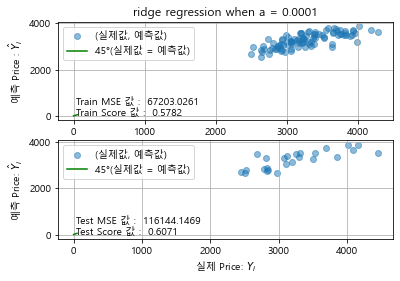

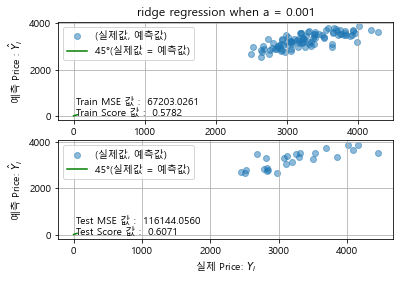

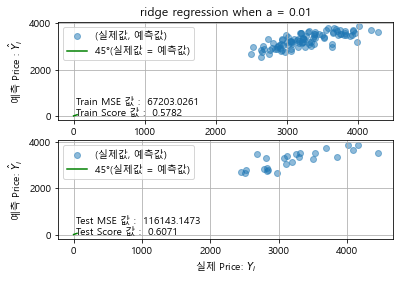

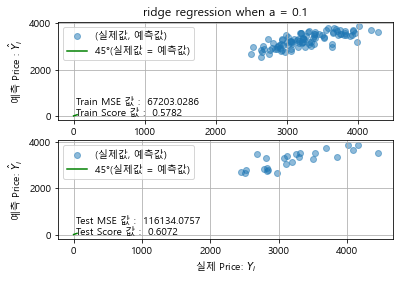

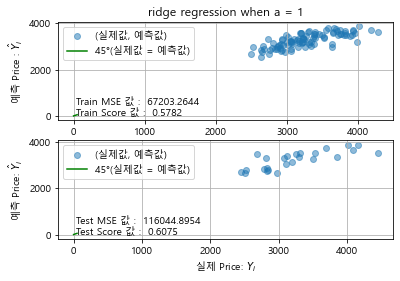

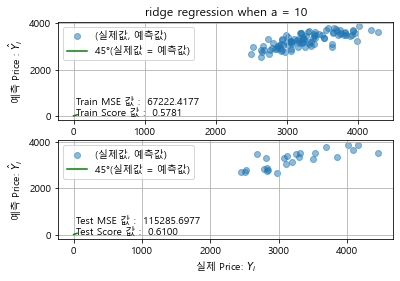

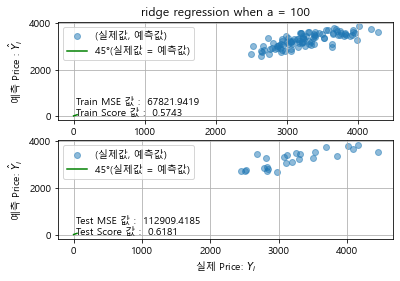

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


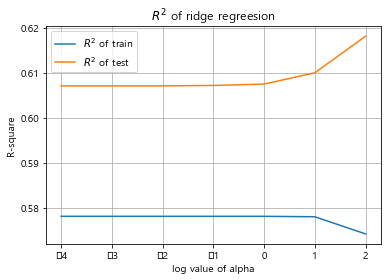

,alpha = 0.0001,alpha = 0.001,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
병아리(원/수),1.2594,1.2594,1.2595,1.2595,1.2602,1.2662,1.2965
일별_평균기온,-14.5124,-14.5123,-14.5117,-14.5051,-14.4401,-13.8572,-10.8712
hot_day,46.9233,46.9232,46.9219,46.9085,46.7759,45.5322,37.1277
cold_day,-30.1804,-30.1799,-30.1753,-30.1285,-29.6680,-25.6603,-9.6687
import amount,0.0236,0.0236,0.0236,0.0236,0.0236,0.0234,0.0226
feedprice,7.0752,7.0752,7.0752,7.0755,7.0778,7.0977,7.1618
oil_avg,-3.5212,-3.5212,-3.5213,-3.5217,-3.5259,-3.5620,-3.6788
count,-0.0707,-0.0707,-0.0707,-0.0706,-0.0703,-0.0674,-0.0693
도축,0.0024,0.0024,0.0024,0.0024,0.0024,0.0025,0.0029
소_소비자가_int,-0.0058,-0.0058,-0.0058,-0.0058,-0.0058,-0.0057,-0.0053


In [29]:
# 함수화 작업
def ridge_regression(data, target_col, plot=True):
    # 라이브러리 호출 
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

    # feature, target 분리
    feature = df.drop(columns='닭고기가격')
    target = df['닭고기가격']

    # 훈련, 검정셋 분리
    X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

    # 빈 리스트 셍성
    train_score = []
    test_score = []
    r_squared = []
    intercept = []
    mse_train = []
    mse_test = []
    # 하이퍼파라미터 적용
    alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    # 라소 회귀 요약 데이터 형성
    ridge_data = pd.DataFrame()

    for alpha in alpha_list:
        # 라소 회귀 시행
        ridge = Ridge(alpha= alpha, max_iter = 10000).fit(X_train, Y_train)
        # 결정계수 및 절편 리스트
        train_score.append(np.round(ridge.score(X_train, Y_train), 4))
        test_score.append(np.round(ridge.score(X_test, Y_test), 4))
        intercept.append(np.round(ridge.intercept_, 4))
        # 라소 회귀에서 도출된 각 feature의 계수
        ridge_data = pd.concat([ridge_data, pd.DataFrame(np.round(ridge.coef_, 4), ridge.feature_names_in_)], axis=1)
        # 훈련, 검정셋에서 y 값 예측 (기댓값 도출)
        Y_pred_train = ridge.predict(X_train)
        Y_pred = ridge.predict(X_test)
        # 훈련, 검정셋에서 MSE 도출 
        mse_train.append(np.round(mean_squared_error(Y_train,Y_pred_train),4))
        mse_test.append(np.round(mean_squared_error(Y_test,Y_pred),4))
        
        # 도식화 여부
        if plot == True:
            plt.subplot(2,1,1)
            plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price : $\hat{Y}_i$")
            plt.title(f'ridge regression when a = {alpha}')
            plt.legend()
            plt.text(y=5,x=30, s=f'Train MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}\nTrain Score 값 : {ridge.score(X_train,Y_train) : .4f}')
            plt.subplot(2,1,2)
            plt.scatter(Y_test,Y_pred, label = '(실제값, 예측값)', alpha=.5)
            plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
            plt.xlabel("실제 Price: $Y_i$")
            plt.ylabel("예측 Price: $\hat{Y}_i$")
            plt.legend(loc='upper left')
            plt.text(y=5,x=30, s=f'Test MSE 값 : {mean_squared_error(Y_test,Y_pred) : .4f}\nTest Score 값 : {ridge.score(X_test,Y_test) : .4f}')
            plt.show()
        else:
            pass
    
    # 결정계수 출력
    plt.plot(np.log10(alpha_list), train_score, label ='$R^2$ of train')
    plt.plot(np.log10(alpha_list), test_score, label ='$R^2$ of test')
    plt.title('$R^2$ of ridge regreesion')
    plt.xlabel('log value of alpha')
    plt.ylabel('R-square')
    plt.legend()
    plt.show()
    
    # 라소 회귀 요약 데이터 형성
    ridge_data.columns = [f'alpha = {i}' for i in alpha_list]
    score = pd.DataFrame({'R^2 of Train' : train_score,
                        'R^2 of Test' : test_score,
                        'intercept' : intercept,
                        'mse_train' : mse_train,
                        'mse_test' : mse_test}).transpose()
    score.columns= [f'alpha = {i}' for i in alpha_list]
    ridge_summary = pd.concat([ridge_data, score], axis=0)

    return ridge_summary

# 데이터는 pd.DataFrame, concat을 사용하여 따로 data를 만들어 주었음
subx = pd.DataFrame(X, columns=df.columns)
suby = pd.DataFrame(y, columns=df['닭고기가격'])

data = pd.concat([subx,suby], axis=1)

# 위의 함수 시행
ridge_regression(data,'target')

### Lasso

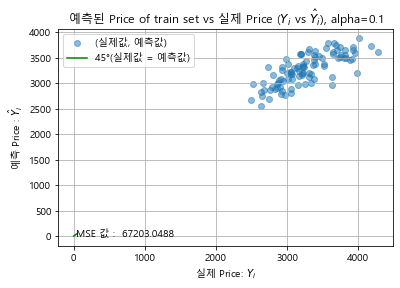

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# feature, target 분리
feature = df.drop(columns='닭고기가격')
target = df['닭고기가격']

# train, test 분리
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

# 하이퍼파라미터 설정
alpha_value = 0.1
lasso = Lasso(alpha=alpha_value).fit(X_train,Y_train) 
Y_pred_train = lasso.predict(X_train) 
Y_pred = lasso.predict(X_test)

# 시각화
plt.scatter(Y_train,Y_pred_train, label = '(실제값, 예측값)', alpha=.5)
plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
plt.xlabel("실제 Price: $Y_i$")
plt.ylabel("예측 Price : $\hat{Y}_i$")
plt.legend()
plt.title("예측된 Price of train set vs 실제 Price ($Y_i$ vs $\hat{Y}_i$), " + f"alpha={alpha_value}")
plt.text(y=0,x=35, s=f'MSE 값 : {mean_squared_error(Y_train,Y_pred_train) : .4f}')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alphas = np.linspace(0, 1, 100)
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(lasso, parameters, scoring='r2',cv=5)
lasso_reg.fit(feature,target)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the 

{'alpha': 1.0}
0.00906909126945028


### Random Forests

In [46]:
# feature, target 분리
feature = df.drop(columns='닭고기가격')
target = df['닭고기가격']

# train, test 분리
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 2022)

In [47]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(feature,target)

RandomForestRegressor()

In [51]:
X_test

,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int
20,269,27.0,12.0,0.0,8084,538.4,107.920606,775,75362,62885,18299
91,100,24.7,3.0,0.0,13615,434.0,61.677899,824,118942,82789,19312
104,103,22.5,0.0,0.0,11221,435.0,42.422391,709,115666,100406,23244
79,246,26.6,15.0,0.0,9301,424.6,72.927879,707,107260,80528,22318
70,500,15.1,0.0,0.0,9045,424.4,54.932727,838,70440,84091,20788
39,600,6.5,0.0,0.0,9453,470.6,53.162121,839,72065,61995,17512
30,350,21.6,0.0,0.0,13086,502.4,108.348413,479,81289,64233,21371
117,312,24.8,3.0,0.0,9360,492.0,69.247955,670,89892,99247,26078
118,408,21.3,0.0,0.0,9009,503.0,72.975152,479,81026,103039,26346
73,100,-2.4,0.0,5.0,11809,416.2,66.318106,486,83367,81435,17841


In [49]:
n_estimators = 10 

max_features = 4 

RF_reg = RandomForestRegressor(n_estimators=n_estimators, random_state=0, max_features=max_features) 

# n_estimators 는 tree의 개수를 의미 

RF_reg.fit(X_train, Y_train) # x_train['RM'].values.reshape(-1, 1) 

# 결과 예측하기 

y_pred = RF_reg.predict(X_test) # x_test['RM'].values.reshape(-1, 1) 

In [50]:
y_pred

array([3743.8, 3029.3, 3056.9, 3172.4, 3165.7, 3694.3, 3244. , 3140.4,
       3252. , 2920.8, 3055.7, 3409.8, 2873.5, 3219.4, 2905.5, 3324.8,
       3034.8, 3536. , 3611.7, 2919.3, 3296.5, 3605.3, 3413.9, 3649.7,
       2855.9])

In [45]:
print(RF_model.score(feature,target))
print(RF_model.score(X_train,y_train))
print(RF_model.score(X_test,y_test))
# 92%의 점수로 지금까지는 가장 유의해보임

0.92834911298763
-0.2932390394018958
-1.4101738126098664


### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2, random_state=1)

dt_regr = DecisionTreeRegressor(max_depth=5)

dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
from sklearn.metrics import r2_score


y_pred = dt_regr.predict(X_test)
print("단순 결정 트리 회귀 : {:.4f}".format(r2_score(y_test,y_pred)))

단순 결정 트리 회귀 : -0.0155


In [ ]:
df.head()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873
1,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879
2,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750
3,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940
4,3255,200,18.1,0.0,0.0,14519,526.2,104.184710,496,73505


In [ ]:
x = df.drop(columns='닭고기가격')
y = df['닭고기가격']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=44)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predctions = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.001309041811760614

In [ ]:
X_test.head()

,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
26,476,7.5,0.0,0.0,9622,497.4,104.199921,560,62701
65,752,21.6,1.0,0.0,9464,436.1,46.379697,479,88521
108,612,-1.1,0.0,5.0,10003,421.0,54.090167,680,73850
52,187,18.4,0.0,0.0,10929,441.1,46.260758,560,86338
69,500,15.1,0.0,0.0,9045,424.4,54.932727,838,70440


In [ ]:
model.predict([[500,7.5,0,0,9700,490,104,560,62701]])

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([4010.])

[Text(0.5234848484848484, 0.9615384615384616, '도축 <= 78638.0\nsquared_error = 205410.855\nsamples = 84\nvalue = 3252.048'),
 Text(0.2409090909090909, 0.8846153846153846, '병아리(원/수) <= 454.0\nsquared_error = 165817.934\nsamples = 36\nvalue = 3544.806'),
 Text(0.1, 0.8076923076923077, 'feedprice <= 461.75\nsquared_error = 91045.202\nsamples = 21\nvalue = 3350.524'),
 Text(0.048484848484848485, 0.7307692307692307, 'count <= 493.0\nsquared_error = 822.25\nsamples = 4\nvalue = 2898.5'),
 Text(0.024242424242424242, 0.6538461538461539, '일별_평균기온 <= 9.85\nsquared_error = 30.25\nsamples = 2\nvalue = 2871.5'),
 Text(0.012121212121212121, 0.5769230769230769, 'squared_error = 0.0\nsamples = 1\nvalue = 2877.0'),
 Text(0.03636363636363636, 0.5769230769230769, 'squared_error = 0.0\nsamples = 1\nvalue = 2866.0'),
 Text(0.07272727272727272, 0.6538461538461539, 'cold_day <= 0.5\nsquared_error = 156.25\nsamples = 2\nvalue = 2925.5'),
 Text(0.06060606060606061, 0.5769230769230769, 'squared_error = 0.0\nsamp

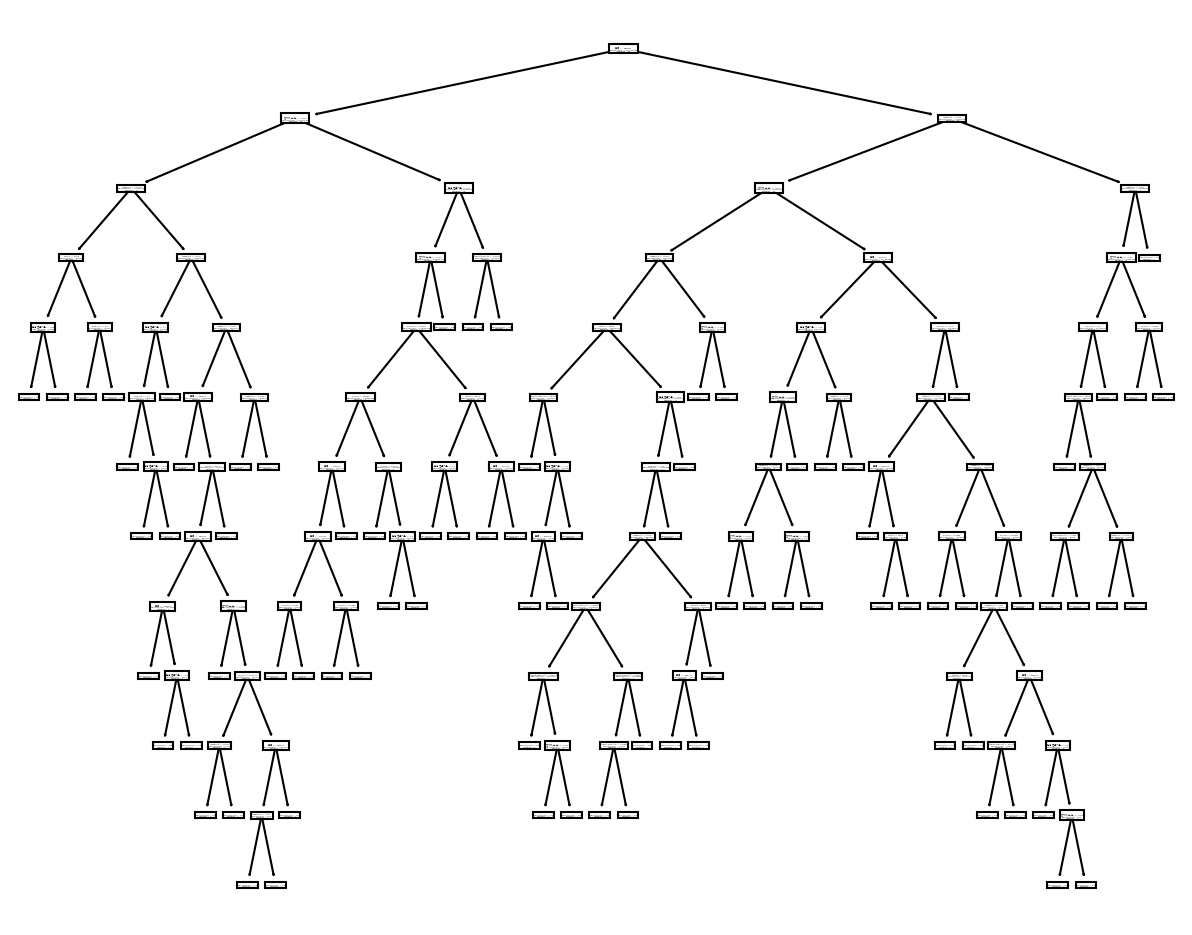

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8),dpi=150)
plot_tree(model, feature_names=x.columns)

### LSTM(월별)

In [ ]:
df.columns

Index(['닭고기가격', '병아리(원/수)', '일별_평균기온', 'hot_day', 'cold_day', 'import amount',
       'feedprice', 'oil_avg', 'count', '도축'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['닭고기가격','병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols


In [ ]:
df_scaled.head()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,0.372686,0.197368,0.033784,0.0,0.666667,0.367022,0.887240,0.889336,0.134185,0.156334
1,0.605803,0.421053,0.047297,0.0,0.500000,0.473057,0.859792,0.946030,0.638978,0.114284
2,0.856428,0.526316,0.266892,0.0,0.000000,0.531282,0.844955,1.000000,0.955272,0.154607
3,0.471236,0.305263,0.503378,0.0,0.000000,0.734517,0.833086,0.958324,0.712460,0.185365
4,0.399200,0.131579,0.695946,0.0,0.000000,0.821854,0.832344,0.859478,0.357827,0.361840


In [ ]:
TEST_SIZE = 24
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [ ]:
train

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,0.372686,0.197368,0.033784,0.0000,0.666667,0.367022,0.887240,0.889336,0.134185,0.156334
1,0.605803,0.421053,0.047297,0.0000,0.500000,0.473057,0.859792,0.946030,0.638978,0.114284
2,0.856428,0.526316,0.266892,0.0000,0.000000,0.531282,0.844955,1.000000,0.955272,0.154607
3,0.471236,0.305263,0.503378,0.0000,0.000000,0.734517,0.833086,0.958324,0.712460,0.185365
4,0.399200,0.131579,0.695946,0.0000,0.000000,0.821854,0.832344,0.859478,0.357827,0.361840
...,...,...,...,...,...,...,...,...,...,...
91,0.175588,0.135526,0.962838,0.5625,0.000000,0.779093,0.118694,0.378501,0.712460,0.698455
92,0.033517,0.406579,0.810811,0.0000,0.000000,0.812229,0.089021,0.402551,0.586262,0.448610
93,0.277139,0.447368,0.608108,0.0000,0.000000,0.730335,0.089021,0.377802,0.824281,0.537388
94,0.021511,0.034211,0.368243,0.0000,0.000000,0.500513,0.074184,0.407683,0.688498,0.516067


In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']
label_cols = ['닭고기가격']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size= .80)
x_train.shape, x_valid.shape

((15, 20, 9), (61, 20, 9))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((24, 9), (24, 1))

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((4, 20, 9), (4, 1))

##### 모형 학습

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 0.4499 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.43717, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 1s 1s/step - loss: 0.4499 - accuracy: 0.0000e+00 - val_loss: 0.4372 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 0.4051 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 0.43717 to 0.39377, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 63ms/step - loss: 0.4051 - accuracy: 0.0000e+00 - val_loss: 0.3938 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 0.3631 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 0.39377 to 0.35317, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.3631 - accuracy: 0.0000e+00 - val_loss: 0.3532 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============

##### 가격 예측

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

1/1 [==============================] - 0s 137ms/step


(4, 1)

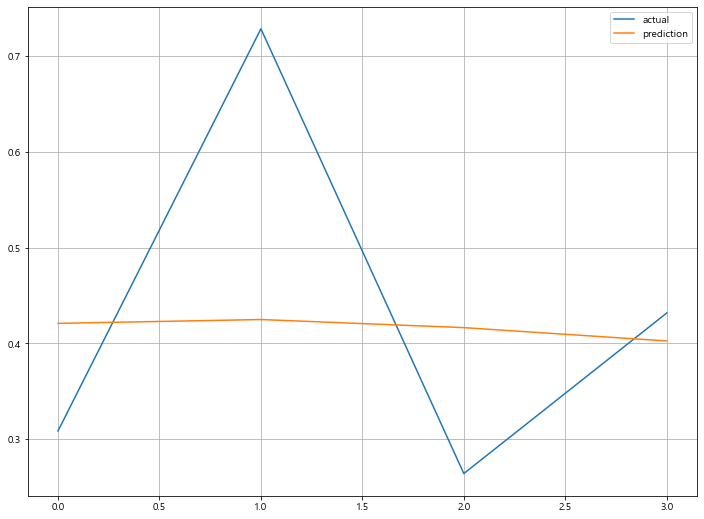

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

#### LSTM(일별)

In [ ]:
data = pd.read_csv('../데이터전처리/pre_data/일별_통합.csv', index_col=0)
data.head()

,date,price,병아리(원/수),Dubai,Brent,WTI,oil_avg,일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,25도이상_최저기온,25도이상_최고기온
0,2021-12-31,4047,400.0,77.12,77.78,75.21,76.703333,-3.9,-7.2,0.1,-3.9,-7.2,0.1,NaN,NaN,NaN
1,2021-12-30,4047,400.0,77.24,79.32,76.99,77.850000,-0.7,-3.3,2.7,-0.7,-3.3,2.7,NaN,NaN,NaN
2,2021-12-29,3895,400.0,76.91,79.23,76.56,77.566667,2.5,-2.5,7.5,2.5,-2.5,7.5,NaN,NaN,NaN
3,2021-12-28,3895,400.0,76.47,78.94,75.98,77.130000,0.0,-5.2,4.9,0.0,-5.2,4.9,NaN,NaN,NaN
4,2021-12-27,3743,400.0,75.42,78.60,75.57,76.530000,-4.6,-11.2,0.5,-4.6,-11.2,0.5,NaN,NaN,NaN


In [ ]:
data.columns

Index(['date', 'price', '병아리(원/수)', 'Dubai', 'Brent', 'WTI', 'oil_avg',
       '일별_평균기온', '일별_최저기온', '일별_최고기온', '13도미만_평균기온', '13도미만_최저기온',
       '13도미만_최고기온', '25도이상_평균기온', '25도이상_최저기온', '25도이상_최고기온'],
      dtype='object')

In [ ]:
data = data[['price','병아리(원/수)','oil_avg','일별_평균기온','일별_최저기온','일별_최고기온']]
data.head()

,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온
0,4047,400.0,76.703333,-3.9,-7.2,0.1
1,4047,400.0,77.850000,-0.7,-3.3,2.7
2,3895,400.0,77.566667,2.5,-2.5,7.5
3,3895,400.0,77.130000,0.0,-5.2,4.9
4,3743,400.0,76.530000,-4.6,-11.2,0.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2995
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2996 non-null   int64  
 1   병아리(원/수)  2995 non-null   float64
 2   oil_avg   2480 non-null   float64
 3   일별_평균기온   2996 non-null   float64
 4   일별_최저기온   2996 non-null   float64
 5   일별_최고기온   2996 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 163.8 KB


In [ ]:
# null값을 결측치 앞,뒷값 평균으로 넣음
data = data.interpolate()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2995
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2996 non-null   int64  
 1   병아리(원/수)  2996 non-null   float64
 2   oil_avg   2996 non-null   float64
 3   일별_평균기온   2996 non-null   float64
 4   일별_최저기온   2996 non-null   float64
 5   일별_최고기온   2996 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 163.8 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['price','병아리(원/수)','oil_avg','일별_평균기온','일별_최저기온','일별_최고기온']
data_scaled = scaler.fit_transform(data[scale_cols])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = scale_cols

In [ ]:
data_scaled.head()
data_scaled.shape

(2996, 6)

In [ ]:
TEST_SIZE = 600
WINDOW_SIZE = 20

train = data_scaled[:-TEST_SIZE]
test = data_scaled[-TEST_SIZE:]

In [ ]:
test

,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온
2396,0.411583,0.125,0.892771,0.197183,0.206089,0.184510
2397,0.411583,0.125,0.895765,0.232394,0.269321,0.184510
2398,0.411583,0.125,0.891955,0.326291,0.358314,0.287016
2399,0.411583,0.125,0.890694,0.279343,0.264637,0.321185
2400,0.470656,0.125,0.888860,0.295775,0.309133,0.289294
...,...,...,...,...,...,...
2991,0.424324,0.125,0.904877,0.227700,0.210773,0.250569
2992,0.405792,0.125,0.905564,0.192488,0.189696,0.200456
2993,0.405792,0.250,0.907369,0.194836,0.238876,0.143508
2994,0.405792,0.250,0.894734,0.244131,0.257611,0.230068


In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['병아리(원/수)','oil_avg','일별_평균기온','일별_최저기온','일별_최고기온']
label_cols = ['price']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size= .80)
x_train.shape, x_valid.shape

((475, 20, 5), (1901, 20, 5))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((600, 5), (600, 1))

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((580, 20, 5), (580, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [ ]:
import os

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
21/30 [====================>.........] - ETA: 0s - loss: 0.0612 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.03155, saving model to model\tmp_checkpoint.h5
30/30 [==============================] - 2s 18ms/step - loss: 0.0517 - accuracy: 0.0021 - val_loss: 0.0315 - val_accuracy: 0.0047
Epoch 2/200
26/30 [=========================>....] - ETA: 0s - loss: 0.0257 - accuracy: 0.0024  
Epoch 2: val_loss improved from 0.03155 to 0.02926, saving model to model\tmp_checkpoint.h5
30/30 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 0.0021 - val_loss: 0.0293 - val_accuracy: 0.0053
Epoch 3/200
24/30 [=======================>......] - ETA: 0s - loss: 0.0245 - accuracy: 0.0026  
Epoch 3: val_loss did not improve from 0.02926
30/30 [==============================] - 0s 13ms/step - loss: 0.0251 - accuracy: 0.0021 - val_loss: 0.0301 - val_accuracy: 0.0053
Epoch 4/200
22/30 [=====================>........] - ETA: 0s - loss: 0.0250 - accuracy: 0.

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

19/19 [==============================] - 0s 2ms/step


(580, 1)

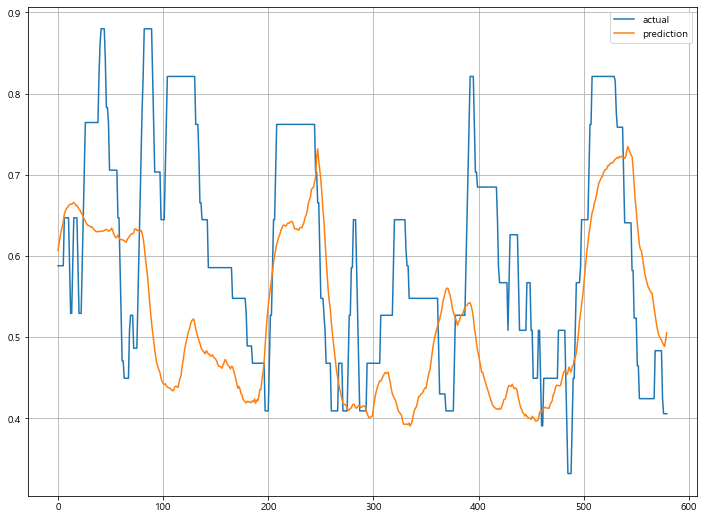

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

### 가진 데이터가 분포가 너무 넓어서, 일반 회귀 모델은 사용했을 때 정확도가 떨어짐. 분류회귀모델과 클러스터링 모델을 사용하는 것으로 변경함(random forest는 안고 가자)

#### Logistic regression model

In [ ]:
# 월별 통합 데이터 = df
df = pd.read_csv('/localRepository/recipes_oraganization/chicken_price_prediction/데이터전처리/pre_data/월별_통합.csv',index_col=0)
df = df[['닭고기가격','병아리(원/수)','일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']]
df.fillna(0, inplace=True) # null값을 0으로 채움
df.head()

,닭고기가격,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축
0,3202,250,-1.5,0.0,4.0,8754,533.6,107.066111,356,58873
1,3668,420,-1.1,0.0,3.0,10098,529.9,112.537302,672,55879
2,4169,500,5.4,0.0,0.0,10836,527.9,117.745606,870,58750
3,3399,332,12.4,0.0,0.0,13412,526.3,113.723667,718,60940
4,3255,200,18.1,0.0,0.0,14519,526.2,104.184710,496,73505


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   닭고기가격          120 non-null    int64  
 1   병아리(원/수)       120 non-null    int64  
 2   일별_평균기온        120 non-null    float64
 3   hot_day        120 non-null    float64
 4   cold_day       120 non-null    float64
 5   import amount  120 non-null    int64  
 6   feedprice      120 non-null    float64
 7   oil_avg        120 non-null    float64
 8   count          120 non-null    int64  
 9   도축             120 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 10.3 KB


In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df, columns=['병아리(원/수)', '일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축','target'])

In [ ]:
df

,병아리(원/수),일별_평균기온,hot_day,cold_day,import amount,feedprice,oil_avg,count,도축,target
0,0.372686,0.197368,0.033784,0.0000,0.666667,0.367022,0.887240,0.889336,0.134185,0.156334
1,0.605803,0.421053,0.047297,0.0000,0.500000,0.473057,0.859792,0.946030,0.638978,0.114284
2,0.856428,0.526316,0.266892,0.0000,0.000000,0.531282,0.844955,1.000000,0.955272,0.154607
3,0.471236,0.305263,0.503378,0.0000,0.000000,0.734517,0.833086,0.958324,0.712460,0.185365
4,0.399200,0.131579,0.695946,0.0000,0.000000,0.821854,0.832344,0.859478,0.357827,0.361840
...,...,...,...,...,...,...,...,...,...,...
115,0.524262,0.278947,0.922297,0.1875,0.000000,0.414832,0.578635,0.497455,0.635783,0.591994
116,0.308654,0.405263,0.804054,0.0000,0.000000,0.387140,0.660237,0.536077,0.330671,0.467472
117,0.728364,0.456579,0.594595,0.0000,0.000000,0.623511,0.697329,0.631598,0.509585,0.470309
118,0.264132,0.282895,0.364865,0.0000,0.000000,0.467298,0.786350,0.607406,0.607029,0.548834


In [ ]:
X = df[['병아리(원/수)', '일별_평균기온','hot_day','cold_day','import amount','feedprice','oil_avg','count','도축']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

##### 로지스틱 회귀 분석 모델은 타겟이 0,1 처럼 둘 중 하나인 이산 형태를 띄고 있을 때 회귀분석 하는 모델이라, 우리가 가진 데이터로 분석하기에 적합하지 않음

### Prophet

In [12]:
# 일별 통합 데이터 = data
data = pd.read_csv('../데이터전처리/pre_data/일별_통합.csv',index_col=0)
data = data[['date','price','병아리(원/수)', 'oil_avg', '일별_평균기온', '일별_최저기온', '일별_최고기온']]
data.fillna(method='ffill',inplace=True) # 일별 데이터 data에서 유가 null 값을 null 뒤에 값으로 채움
data

,date,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온
0,2021-12-31,4047,400.0,76.703333,-3.9,-7.2,0.1
1,2021-12-30,4047,400.0,77.850000,-0.7,-3.3,2.7
2,2021-12-29,3895,400.0,77.566667,2.5,-2.5,7.5
3,2021-12-28,3895,400.0,77.130000,0.0,-5.2,4.9
4,2021-12-27,3743,400.0,76.530000,-4.6,-11.2,0.5
...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200.0,108.180000,-2.6,-7.8,3.7
2992,2012-01-05,3118,200.0,108.260000,-4.1,-8.7,1.5
2993,2012-01-04,3118,300.0,108.470000,-4.0,-6.6,-1.0
2994,2012-01-03,3118,300.0,107.000000,-1.9,-5.8,2.8


In [53]:
# !pip install Prophet

In [54]:
# prophet은 ds,y라는 두가지 컬럼만 있어야 함(컬럼 이름 맞추기)
data = data[['date', 'price']]
data = data.rename(columns=({'date':'ds','price':'y'}))

In [55]:
from prophet import Prophet

m = Prophet()
m.fit(data)

09:46:39 - cmdstanpy - INFO - Chain [1] start processing
09:46:40 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3356,2022-12-27
3357,2022-12-28
3358,2022-12-29
3359,2022-12-30
3360,2022-12-31


In [57]:
# yhat(예측값), yhat_lower(예측 최소값), yhat_upper(예측 최대값)

forecast = m.predict(future)
forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()
# forecast.to_csv('./prophet_예측값.csv')

,ds,yhat,yhat_lower,yhat_upper
3356,2022-12-27,3897.764778,3372.175557,4448.448621
3357,2022-12-28,3916.594962,3338.265545,4424.394835
3358,2022-12-29,3936.428393,3407.147319,4500.386104
3359,2022-12-30,3940.591082,3438.241775,4499.438730
3360,2022-12-31,3934.225106,3403.024879,4496.652343


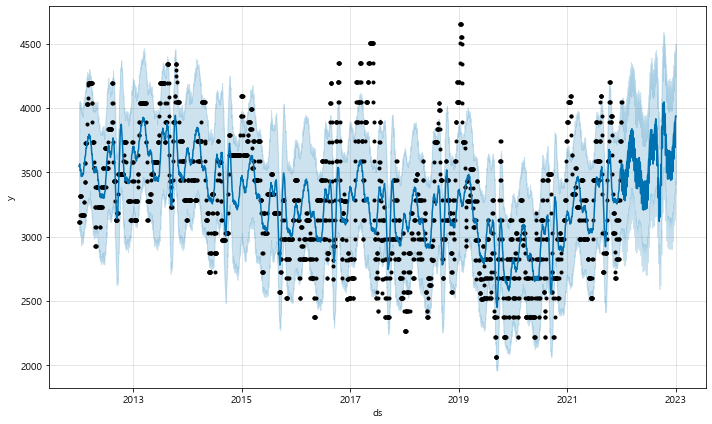

In [58]:
# 예측값 시각화
fig1 = m.plot(forecast)
# 검정색 점 : 실제 데이터 값
# 파란색 실선 : 예측값
# 하늘색 범위 : lower, upper 영역

##### 상한가, 하한가 지정

In [60]:
# 상한가를 4500, 하한가 2000으로 제한
data['cap'] = 4500
data['floor'] = 2000

m = Prophet()
m.fit(data)

09:47:00 - cmdstanpy - INFO - Chain [1] start processing
09:47:01 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 4500
future['floor'] = 2000

forecast = m.predict(future)
# forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3356,2022-12-27,3811.015706,4500,3333.375659,4453.505335,3610.369701,4013.935466,86.749073,86.749073,86.749073,14.640029,14.640029,14.640029,72.109043,72.109043,72.109043,0.0,0.0,0.0,3897.764778
3357,2022-12-28,3812.031938,4500,3366.058399,4473.658630,3610.780874,4016.213239,104.563025,104.563025,104.563025,27.087407,27.087407,27.087407,77.475617,77.475617,77.475617,0.0,0.0,0.0,3916.594962
3358,2022-12-29,3813.048170,4500,3328.176831,4437.152282,3611.192047,4018.150631,123.380223,123.380223,123.380223,41.835787,41.835787,41.835787,81.544436,81.544436,81.544436,0.0,0.0,0.0,3936.428393
3359,2022-12-30,3814.064402,4500,3370.085426,4514.749395,3611.603220,4019.730864,126.526680,126.526680,126.526680,42.217878,42.217878,42.217878,84.308802,84.308802,84.308802,0.0,0.0,0.0,3940.591082
3360,2022-12-31,3815.080634,4500,3379.681166,4483.649762,3612.014393,4022.329326,119.144472,119.144472,119.144472,33.361751,33.361751,33.361751,85.782721,85.782721,85.782721,0.0,0.0,0.0,3934.225106


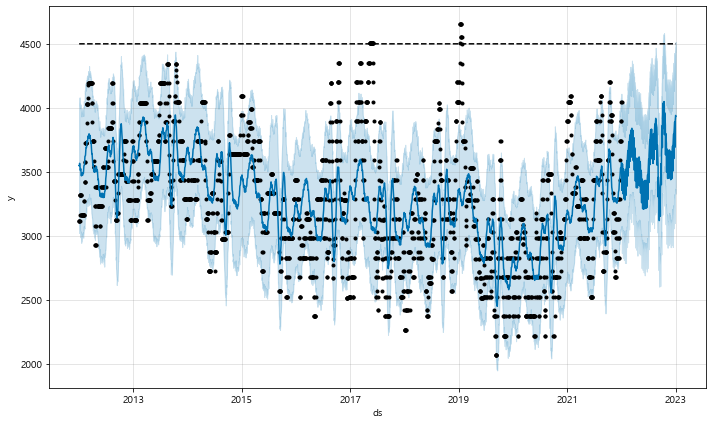

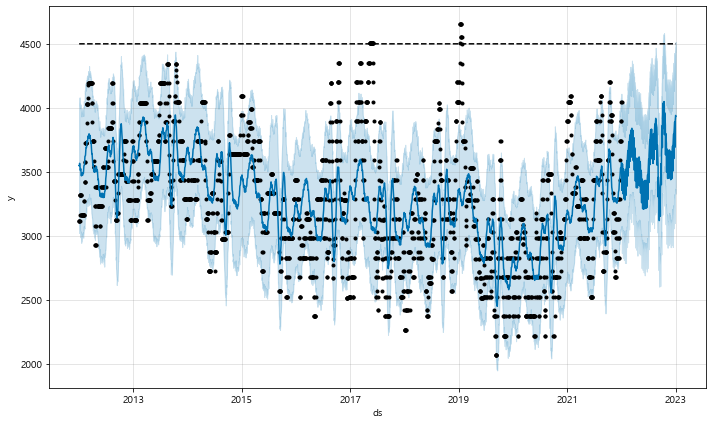

In [62]:
m.plot(forecast)

##### holidays 지정

In [25]:
# !pip install korean_lunar_calendar

In [26]:
# from korean_lunar_calendar import KoreanLunarCalendar

# calendar = KoreanLunarCalendar()

# def lunar_to_solar(year, month, day):
#     calendar.setLunarDate(year,month,day, False)
#     cal = calendar.SolarIsoFormat()
#     return cal

In [27]:
# lunar_new_year = []

# for i in range(0,11):
#     lunar_new_year.append(lunar_to_solar(2011+i, 1, 1)) 

In [28]:
# Chu_seok = []

# for c in range(0,11):
#     Chu_seok.append(lunar_to_solar(2011+c,8,15))

In [63]:
# new_year = pd.DataFrame({
# 'holiday': 'new_year',
# 'ds': pd.to_datetime(['2011-01-01','2012-01-01', '2013-01-01',
#                       '2014-01-01', '2015-01-01', '2016-01-01',
#                       '2017-01-01', '2018-01-01', '2019-01-01',
#                       '2020-01-01', '2021-01-01']),
# 'lower_window': 0,
# 'upper_window': 1,
# })

# lunar_new_year = pd.DataFrame({
#     'holiday': 'lunar_new_year',
#     'ds': lunar_new_year,
#     'lower_window': 0,
#     'upper_window': 1,
#   })

# Chu_seok = pd.DataFrame({
#     'holiday': 'Chu_seok',
#     'ds': Chu_seok,
#     'lower_window': 0,
#     'upper_window': 1,
#   })

Bok_nal = pd.DataFrame({
'holiday': 'Bok_nal',
'ds': pd.to_datetime(['2011-07-14', '2011-07-24', '2011-08-13',
                      '2012-07-18', '2012-07-28','2012-08-07',
                      '2013-07-13', '2013-07-23', '2013-08-12',
                      '2014-07-18', '2014-07-28', '2014-08-07',
                      '2015-07-13', '2015-07-23', '2015-08-12',
                      '2016-07-17', '2016-07-27', '2016-08-16',
                      '2017-07-12', '2017-07-22', '2017-08-11',
                      '2018-07-17', '2018-07-27', '2018-08-16',
                      '2019-07-12', '2019-07-22', '2019-08-11',
                      '2020-07-16', '2020-07-26', '2020-08-15',
                      '2021-07-11', '2021-07-21', '2021-08-10'
                      ]),
'lower_window': 0,
'upper_window': 1,
})

AI = pd.DataFrame({
'holiday': 'AI',
'ds': pd.to_datetime([
    '2015-01-14', '2015-01-21', '2015-01-22','2015-01-23', '2015-01-31', 
    '2015-02-10', '2015-03-09', '2015-03-10', '2015-03-15', '2015-03-26', 
    '2015-03-28', '2015-03-31', '2015-04-01', '2015-04-03', '2015-04-05', 
    '2015-04-06', '2015-04-10', '2015-04-11', '2015-04-13', '2015-04-14', 
    '2015-04-20', '2016-11-16', '2016-11-22', '2016-11-23', '2016-11-26', 
    '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
    '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05', '2016-12-06', 
    '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-10', '2016-12-11', 
    '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
    '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21', 
    '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', 
    '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
    '2017-01-01', '2017-01-03', '2017-01-05', '2017-01-07', '2017-01-08', 
    '2017-01-09', '2017-01-10', '2017-01-12', '2017-01-14', '2017-01-20', 
    '2017-01-21', '2017-01-24', '2017-02-06', '2017-02-09', '2017-02-22', 
    '2017-02-27', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', 
    '2017-03-17', '2017-03-19', '2017-03-22', '2017-03-23', '2017-03-26', 
    '2017-03-27', '2017-03-29', '2017-04-02', '2017-06-03', '2018-01-03', 
    '2018-01-26', '2018-01-27', '2018-02-04', '2018-02-08', '2018-03-16', 
    '2018-03-17',
    '2020-12-06', '2020-12-12', '2020-12-14', '2020-12-16', '2020-12-21', 
    '2020-12-22', '2020-12-25', '2020-12-28', '2020-12-28', '2020-12-29',
    '2020-12-29', '2020-12-31', '2021-01-01', '2021-01-03', '2021-01-04',
    '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-11', '2021-01-12',
    '2021-01-13', '2021-01-18', '2021-01-21', '2021-01-22', '2021-01-23',
    '2021-01-26', '2021-01-26', '2021-01-27', '2021-01-29', '2021-01-30',
    '2021-01-31', '2021-02-01', '2021-02-07', '2021-02-09', '2021-02-12', 
    '2021-02-13', '2021-02-15', '2021-02-17', '2021-02-22', '2021-02-23',
    '2021-02-26', '2021-03-10', '2021-03-10', '2021-03-11', '2021-11-19',
    '2021-12-03', '2021-12-05', '2021-12-11', '2021-12-14', '2021-12-16',
    '2021-12-20', '2021-12-23', '2022-01-21', '2022-01-21', '2022-01-23',
    '2022-01-29', '2022-10-21'
                      ]),
'lower_window': 0,
'upper_window': 1,
})

# holidays = pd.concat((new_year, lunar_new_year,Chu_seok,Bok_nal))
holidays = pd.concat((Bok_nal, AI))

In [64]:
# add_country_holidays(country_name = 'KR')에 공휴일 다 등록되어 있어서, 임의로 넣은 설날 추석 빼고 복날이랑 조류 인플루엔자가 10,000건 이상 발생한 일자만 넣음
holidays

,holiday,ds,lower_window,upper_window
0,Bok_nal,2011-07-14,0,1
1,Bok_nal,2011-07-24,0,1
2,Bok_nal,2011-08-13,0,1
3,Bok_nal,2012-07-18,0,1
4,Bok_nal,2012-07-28,0,1
...,...,...,...,...
147,AI,2022-01-21,0,1
148,AI,2022-01-21,0,1
149,AI,2022-01-23,0,1
150,AI,2022-01-29,0,1


In [65]:
# 한국 공휴일과 복날 반영, chagepoint 유연성 조정(원래 chagepoint_prior_scale은 0.05임)
# data['cap'] = 4500
# data['floor'] = 1500

m = Prophet(holidays=holidays, changepoint_prior_scale=0.5, seasonality_mode='multiplicative', interval_width=0.95)
m.add_country_holidays(country_name = 'KR').fit(data)

future = m.make_future_dataframe(periods=30)
# future['cap'] = 4500
# future['floor'] = 1500

forcast = m.predict(future)
# forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()

09:47:20 - cmdstanpy - INFO - Chain [1] start processing
09:47:26 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3356,2022-12-27,3811.015706,4500,3333.375659,4453.505335,3610.369701,4013.935466,86.749073,86.749073,86.749073,14.640029,14.640029,14.640029,72.109043,72.109043,72.109043,0.0,0.0,0.0,3897.764778
3357,2022-12-28,3812.031938,4500,3366.058399,4473.658630,3610.780874,4016.213239,104.563025,104.563025,104.563025,27.087407,27.087407,27.087407,77.475617,77.475617,77.475617,0.0,0.0,0.0,3916.594962
3358,2022-12-29,3813.048170,4500,3328.176831,4437.152282,3611.192047,4018.150631,123.380223,123.380223,123.380223,41.835787,41.835787,41.835787,81.544436,81.544436,81.544436,0.0,0.0,0.0,3936.428393
3359,2022-12-30,3814.064402,4500,3370.085426,4514.749395,3611.603220,4019.730864,126.526680,126.526680,126.526680,42.217878,42.217878,42.217878,84.308802,84.308802,84.308802,0.0,0.0,0.0,3940.591082
3360,2022-12-31,3815.080634,4500,3379.681166,4483.649762,3612.014393,4022.329326,119.144472,119.144472,119.144472,33.361751,33.361751,33.361751,85.782721,85.782721,85.782721,0.0,0.0,0.0,3934.225106


In [49]:
# trend 반영 후 예측 값
forecast.tail()
forecast.to_csv('./trend_반영_prophet_예측값.csv')

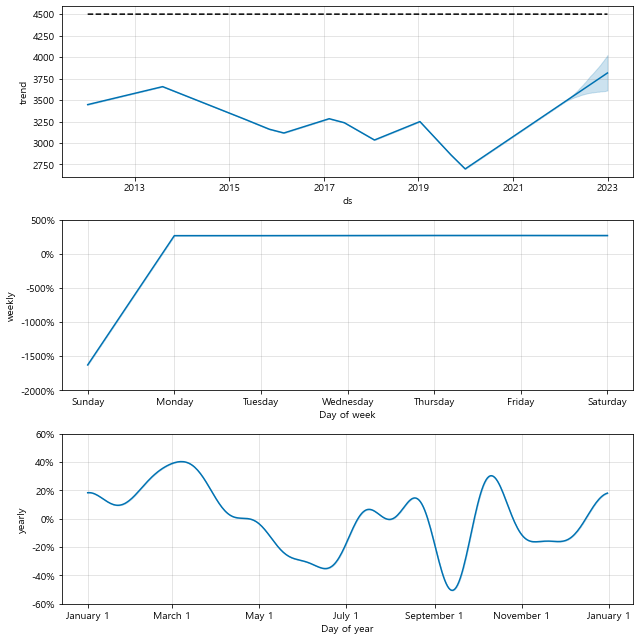

In [66]:
fig = m.plot_components(forecast)
# 시계열 추세, 연간 계절성, 주간 계절성 표시

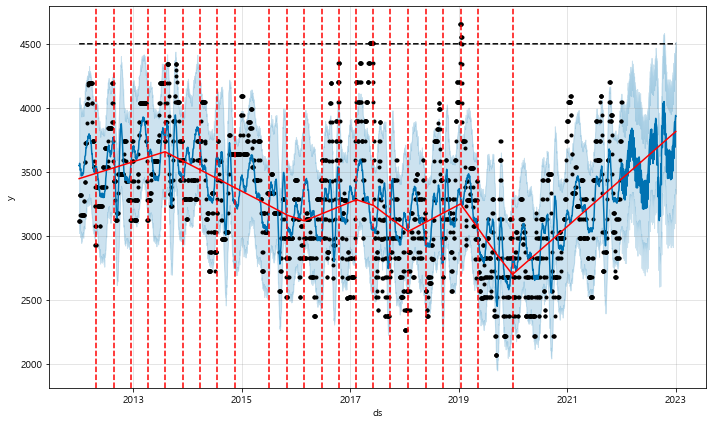

In [67]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# 빨간 점선 : ChangePoint
# 빨간 실선 : Trend
# 검정색 점 : 실제 데이터 값
# 파란색 실선 : 예측 값
# 하늘색 범위 : lower, upper 영역

In [68]:
# trend 반영 전후 비교
trend_pred = pd.read_csv('./trend_반영_prophet_예측값.csv')
not_trend_pred = pd.read_csv('./prophet_예측값.csv')

In [38]:
# trend 반영한 2022년 예측값만 뽑아냄
trend_pred['ds'] = pd.to_datetime(trend_pred['ds'])
trend_pred['year'] = trend_pred['ds'].dt.year
trend_pred = trend_pred.query('year==2022')
trend_pred

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,year
2996,2996,2022-01-01,3458.799399,3108.281118,4031.975717,3458.799399,3458.799399,0.0,0.0,0.0,...,35.001290,35.001290,91.276827,91.276827,91.276827,0.0,0.0,0.0,3585.077517,2022
2997,2997,2022-01-02,3459.863873,2868.730310,3856.079885,3459.863873,3459.863873,0.0,0.0,0.0,...,-179.623456,-179.623456,90.050646,90.050646,90.050646,0.0,0.0,0.0,3370.291064,2022
2998,2998,2022-01-03,3460.928348,3087.138933,4073.170451,3460.928348,3460.928348,0.0,0.0,0.0,...,16.305012,16.305012,87.667275,87.667275,87.667275,0.0,0.0,0.0,3564.900636,2022
2999,2999,2022-01-04,3461.992823,3043.827120,4051.033352,3461.992823,3461.992823,0.0,0.0,0.0,...,15.777608,15.777608,84.222549,84.222549,84.222549,0.0,0.0,0.0,3561.992980,2022
3000,3000,2022-01-05,3463.057298,3067.443580,4076.988799,3463.057298,3463.057298,0.0,0.0,0.0,...,28.333949,28.333949,79.827292,79.827292,79.827292,0.0,0.0,0.0,3571.218538,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,3356,2022-12-27,3842.010291,3401.351015,4443.943187,3651.662814,4066.942879,0.0,0.0,0.0,...,15.777608,15.777608,76.430802,76.430802,76.430802,0.0,0.0,0.0,3934.218701,2022
3357,3357,2022-12-28,3843.074766,3435.661907,4522.890343,3652.021785,4069.595817,0.0,0.0,0.0,...,28.333949,28.333949,82.112287,82.112287,82.112287,0.0,0.0,0.0,3953.521001,2022
3358,3358,2022-12-29,3844.139240,3424.292848,4533.673382,3652.380756,4072.248755,0.0,0.0,0.0,...,41.489865,41.489865,86.447411,86.447411,86.447411,0.0,0.0,0.0,3972.076517,2022
3359,3359,2022-12-30,3845.203715,3446.587513,4534.281698,3651.654909,4074.490535,0.0,0.0,0.0,...,42.715731,42.715731,89.426956,89.426956,89.426956,0.0,0.0,0.0,3977.346403,2022


In [39]:
# trend 반영하지 않은 2022년 예측값만 뽑아냄
not_trend_pred['ds'] = pd.to_datetime(not_trend_pred['ds'])
not_trend_pred['year'] = not_trend_pred['ds'].dt.year
not_trend_pred = not_trend_pred.query('year==2022')
not_trend_pred

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,year
2996,2996,2022-01-01,3458.799399,3108.281118,4031.975717,3458.799399,3458.799399,0.0,0.0,0.0,...,35.001290,35.001290,91.276827,91.276827,91.276827,0.0,0.0,0.0,3585.077517,2022
2997,2997,2022-01-02,3459.863873,2868.730310,3856.079885,3459.863873,3459.863873,0.0,0.0,0.0,...,-179.623456,-179.623456,90.050646,90.050646,90.050646,0.0,0.0,0.0,3370.291064,2022
2998,2998,2022-01-03,3460.928348,3087.138933,4073.170451,3460.928348,3460.928348,0.0,0.0,0.0,...,16.305012,16.305012,87.667275,87.667275,87.667275,0.0,0.0,0.0,3564.900636,2022
2999,2999,2022-01-04,3461.992823,3043.827120,4051.033352,3461.992823,3461.992823,0.0,0.0,0.0,...,15.777608,15.777608,84.222549,84.222549,84.222549,0.0,0.0,0.0,3561.992980,2022
3000,3000,2022-01-05,3463.057298,3067.443580,4076.988799,3463.057298,3463.057298,0.0,0.0,0.0,...,28.333949,28.333949,79.827292,79.827292,79.827292,0.0,0.0,0.0,3571.218538,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,3356,2022-12-27,3842.010291,3401.351015,4443.943187,3651.662814,4066.942879,0.0,0.0,0.0,...,15.777608,15.777608,76.430802,76.430802,76.430802,0.0,0.0,0.0,3934.218701,2022
3357,3357,2022-12-28,3843.074766,3435.661907,4522.890343,3652.021785,4069.595817,0.0,0.0,0.0,...,28.333949,28.333949,82.112287,82.112287,82.112287,0.0,0.0,0.0,3953.521001,2022
3358,3358,2022-12-29,3844.139240,3424.292848,4533.673382,3652.380756,4072.248755,0.0,0.0,0.0,...,41.489865,41.489865,86.447411,86.447411,86.447411,0.0,0.0,0.0,3972.076517,2022
3359,3359,2022-12-30,3845.203715,3446.587513,4534.281698,3651.654909,4074.490535,0.0,0.0,0.0,...,42.715731,42.715731,89.426956,89.426956,89.426956,0.0,0.0,0.0,3977.346403,2022


In [40]:
trend_pred.columns

Index(['Unnamed: 0', 'ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'Alternative holiday of Children's Day',
       'Alternative holiday of Children's Day_lower',
       'Alternative holiday of Children's Day_upper',
       ...
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat', 'year'],
      dtype='object', length=105)

In [41]:
trend_pred = trend_pred[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower','trend_upper', 'yhat']]
not_trend_pred = not_trend_pred[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower','trend_upper', 'yhat']]

In [42]:
all_pred = pd.merge(trend_pred,not_trend_pred,how='outer', on='ds')
all_pred

,ds,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,yhat_x,trend_y,yhat_lower_y,yhat_upper_y,trend_lower_y,trend_upper_y,yhat_y
0,2022-01-01,3458.799399,3108.281118,4031.975717,3458.799399,3458.799399,3585.077517,3458.799399,3108.281118,4031.975717,3458.799399,3458.799399,3585.077517
1,2022-01-02,3459.863873,2868.730310,3856.079885,3459.863873,3459.863873,3370.291064,3459.863873,2868.730310,3856.079885,3459.863873,3459.863873,3370.291064
2,2022-01-03,3460.928348,3087.138933,4073.170451,3460.928348,3460.928348,3564.900636,3460.928348,3087.138933,4073.170451,3460.928348,3460.928348,3564.900636
3,2022-01-04,3461.992823,3043.827120,4051.033352,3461.992823,3461.992823,3561.992980,3461.992823,3043.827120,4051.033352,3461.992823,3461.992823,3561.992980
4,2022-01-05,3463.057298,3067.443580,4076.988799,3463.057298,3463.057298,3571.218538,3463.057298,3067.443580,4076.988799,3463.057298,3463.057298,3571.218538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,3842.010291,3401.351015,4443.943187,3651.662814,4066.942879,3934.218701,3842.010291,3401.351015,4443.943187,3651.662814,4066.942879,3934.218701
361,2022-12-28,3843.074766,3435.661907,4522.890343,3652.021785,4069.595817,3953.521001,3843.074766,3435.661907,4522.890343,3652.021785,4069.595817,3953.521001
362,2022-12-29,3844.139240,3424.292848,4533.673382,3652.380756,4072.248755,3972.076517,3844.139240,3424.292848,4533.673382,3652.380756,4072.248755,3972.076517
363,2022-12-30,3845.203715,3446.587513,4534.281698,3651.654909,4074.490535,3977.346403,3845.203715,3446.587513,4534.281698,3651.654909,4074.490535,3977.346403


In [43]:
check_dupli = all_pred['yhat_x'] == all_pred['yhat_y']
pd.Series.unique(check_dupli)
# trend열 기준으로 trend 반영 전/후 결과가 똑같음

array([ True])

#### prophet 교차검증

In [ ]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m,initial='1095 days', period='180 days', horizon='30 days')
df_cv.head()

  0%|          | 0/15 [00:00<?, ?it/s]17:17:09 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:17:09 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:17:09 - cmdstanpy - INFO - CmdStan start processing






























chain 1 |██████████| 01:21 Sampling completed                     
chain 2 |██████████| 01:21 Sampling completed                     
chain 3 |██████████| 01:21 Sampling completed                     
chain 4 |██████████| 01:21 Sampling completed                     


17:18:30 - cmdstanpy - INFO - CmdStan done processing.
17:18:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan',

  7%|▋         | 1/15 [01:22<19:19, 82.86s/it]17:18:32 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:18:32 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:18:32 - cmdstanpy - INFO - CmdStan start processing






























chain 1 |██████████| 02:38 Sampling completed                     
chain 2 |██████████| 02:38 Sampling completed                     
chain 3 |██████████| 02:38 Sampling completed                     
chain 4 |██████████| 02:38 Sampling completed                     


17:21:10 - cmdstanpy - INFO - CmdStan done processing.
17:21:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, c

17:21:10 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 150 iterations at max treedepth (100.0%)
	Chain 2 had 150 iterations at max treedepth (100.0%)
	Chain 3 had 150 iterations at max treedepth (100.0%)
	Chain 4 had 150 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.
 13%|█▎        | 2/15 [04:03<27:55, 128.91s/it]17:21:13 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:21:13 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:21:13 - cmdstanpy - INFO - CmdStan start processing






























chain 1 |██████████| 03:23 Sampling completed                     
chain 2 |██████████| 03:23 Sampling completed                     
chain 3 |██████████| 03:23 Sampling completed   


17:24:37 - cmdstanpy - INFO - CmdStan done processing.
17:24:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan',

 20%|██        | 3/15 [07:30<32:49, 164.14s/it]17:24:39 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:24:39 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:24:39 - cmdstanpy - INFO - CmdStan start processing






























chain 1 |██████████| 04:50 Sampling completed                     
chain 2 |██████████| 04:50 Sampling completed                     
chain 3 |██████████| 04:50 Sampling completed                     
chain 4 |██████████| 04:50 Sampling completed                     


17:29:30 - cmdstanpy - INFO - CmdStan done processing.
17:29:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, c

 27%|██▋       | 4/15 [12:23<39:27, 215.24s/it]17:29:33 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:29:33 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:29:33 - cmdstanpy - INFO - CmdStan start processing

































chain 1 |██████████| 04:46 Sampling completed                     
chain 2 |██████████| 04:46 Sampling completed                     
chain 3 |██████████| 04:46 Sampling completed                     
chain 4 |██████████| 04:46 Sampling completed                     


17:34:19 - cmdstanpy - INFO - CmdStan done processing.
17:34:19 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan',

 33%|███▎      | 5/15 [17:12<40:16, 241.63s/it]17:34:21 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:34:21 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:34:21 - cmdstanpy - INFO - CmdStan start processing






























chain 1 |██████████| 05:58 Sampling completed                     
chain 2 |██████████| 05:58 Sampling completed                     
chain 3 |██████████| 05:58 Sampling completed                     
chain 4 |██████████| 05:58 Sampling completed                     


17:40:20 - cmdstanpy - INFO - CmdStan done processing.
17:40:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 40%|████      | 6/15 [23:12<42:18, 282.02s/it]17:40:22 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:40:22 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:40:22 - cmdstanpy - INFO - CmdStan start processing

































chain 1 |██████████| 07:06 Sampling completed                     
chain 2 |██████████| 07:06 Sampling completed                     
chain 3 |██████████| 07:06 Sampling completed                     
chain 4 |██████████| 07:06 Sampling completed                     


17:47:29 - cmdstanpy - INFO - CmdStan done processing.
17:47:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 47%|████▋     | 7/15 [30:21<44:00, 330.00s/it]17:47:30 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:47:30 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:47:30 - cmdstanpy - INFO - CmdStan start processing

































chain 1 |██████████| 06:17 Sampling completed                     
chain 2 |██████████| 06:17 Sampling completed                     
chain 3 |██████████| 06:17 Sampling completed                     
chain 4 |██████████| 06:17 Sampling completed                     


17:53:48 - cmdstanpy - INFO - CmdStan done processing.
17:53:48 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 53%|█████▎    | 8/15 [36:41<40:20, 345.84s/it]17:53:50 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
17:53:50 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
17:53:50 - cmdstanpy - INFO - CmdStan start processing




































chain 1 |██████████| 10:22 Sampling completed                     
chain 2 |██████████| 10:22 Sampling completed                     
chain 3 |██████████| 10:22 Sampling completed                     
chain 4 |██████████| 10:22 Sampling completed                     


18:04:13 - cmdstanpy - INFO - CmdStan done processing.
18:04:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 60%|██████    | 9/15 [47:05<43:18, 433.06s/it]18:04:15 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
18:04:15 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
18:04:15 - cmdstanpy - INFO - CmdStan start processing




































chain 1 |██████████| 09:20 Sampling completed                     
chain 2 |██████████| 09:20 Sampling completed                     
chain 3 |██████████| 09:20 Sampling completed                     
chain 4 |██████████| 09:20 Sampling completed                     


18:13:35 - cmdstanpy - INFO - CmdStan done processing.
18:13:35 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 67%|██████▋   | 10/15 [56:28<39:24, 472.97s/it]18:13:37 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
18:13:37 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
18:13:37 - cmdstanpy - INFO - CmdStan start processing




































chain 1 |██████████| 11:13 Sampling completed                     
chain 2 |██████████| 11:13 Sampling completed                     
chain 3 |██████████| 11:13 Sampling completed                     
chain 4 |██████████| 11:13 Sampling completed                     


18:24:51 - cmdstanpy - INFO - CmdStan done processing.
18:24:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 73%|███████▎  | 11/15 [1:07:44<35:40, 535.05s/it]18:24:53 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
18:24:53 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
18:24:53 - cmdstanpy - INFO - CmdStan start processing




































chain 1 |██████████| 13:00 Sampling completed                     
chain 2 |██████████| 13:00 Sampling completed                     
chain 3 |██████████| 13:00 Sampling completed                     
chain 4 |██████████| 13:00 Sampling completed                     


18:37:54 - cmdstanpy - INFO - CmdStan done processing.
18:37:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 80%|████████  | 12/15 [1:20:46<30:31, 610.38s/it]18:37:56 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
18:37:56 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
18:37:56 - cmdstanpy - INFO - CmdStan start processing




































chain 1 |██████████| 15:41 Sampling completed                     
chain 2 |██████████| 15:41 Sampling completed                     
chain 3 |██████████| 15:41 Sampling completed                     
chain 4 |██████████| 15:41 Sampling completed                     


18:53:37 - cmdstanpy - INFO - CmdStan done processing.
18:53:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

 87%|████████▋ | 13/15 [1:36:30<23:42, 711.30s/it]18:53:39 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
18:53:39 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
18:53:39 - cmdstanpy - INFO - CmdStan start processing




































chain 1 |██████████| 16:46 Sampling completed                     
chain 2 |██████████| 16:46 Sampling completed                     
chain 3 |██████████| 16:46 Sampling completed                     
chain 4 |██████████| 16:46 Sampling completed                     


19:10:26 - cmdstanpy - INFO - CmdStan done processing.
19:10:26 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, co

19:10:26 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 150 iterations at max treedepth (100.0%)
	Chain 2 had 150 iterations at max treedepth (100.0%)
	Chain 3 had 150 iterations at max treedepth (100.0%)
	Chain 4 had 150 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.
 93%|█████████▎| 14/15 [1:53:19<13:21, 801.21s/it]19:10:28 - cmdstanpy - INFO - CmdStan installation C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
19:10:28 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
19:10:28 - cmdstanpy - INFO - CmdStan start processing




































chain 1 |██████████| 17:39 Sampling completed                     
chain 2 |██████████| 17:39 Sampling completed                     
chain 3 |██████████| 17:39 Sampling com


19:28:08 - cmdstanpy - INFO - CmdStan done processing.
19:28:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, co

19:28:08 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 150 iterations at max treedepth (100.0%)
	Chain 2 had 150 iterations at max treedepth (100.0%)
	Chain 3 had 150 iterations at max treedepth (100.0%)
	Chain 4 had 150 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.
100%|██████████| 15/15 [2:11:00<00:00, 524.06s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-08,4293.724917,3894.872012,4550.644126,3791,2015-01-07
1,2015-01-09,4328.449459,3928.687349,4593.375625,3638,2015-01-07
2,2015-01-10,4347.954759,3912.951090,4613.221177,3638,2015-01-07
3,2015-01-12,4384.749703,3968.440469,4653.874428,3638,2015-01-07
4,2015-01-13,4406.719857,3966.778687,4687.151634,3638,2015-01-07


#### 모델 성능 확인

In [ ]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3.215713e+05,567.072588,442.733575,0.141260,0.117659,0.135700,0.738046
1,4 days,3.246203e+05,569.754571,441.253042,0.143075,0.118762,0.136411,0.729730
2,5 days,3.492663e+05,590.987570,457.935568,0.150896,0.168696,0.141453,0.702703
3,6 days,3.850351e+05,620.511955,481.120292,0.163829,0.162426,0.150364,0.630631
4,7 days,3.928164e+05,626.750630,501.344094,0.168735,0.162426,0.158645,0.611227
5,8 days,5.135734e+05,716.640382,551.464004,0.187656,0.162426,0.181872,0.634096
6,9 days,5.790056e+05,760.924171,592.953363,0.199794,0.172306,0.193249,0.604990
7,10 days,6.598709e+05,812.324355,649.106660,0.220644,0.183567,0.208578,0.567568
8,11 days,5.773538e+05,759.838028,636.596941,0.215679,0.194596,0.200324,0.486486
9,12 days,5.291933e+05,727.456761,611.863341,0.204436,0.189188,0.189929,0.513514


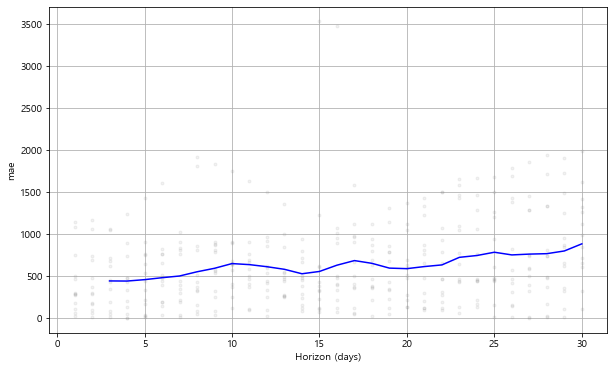

In [ ]:
# 교차 검증 시각화
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mae')

#### 5년치 데이터로 prophet 학습

In [13]:
data

,date,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온
0,2021-12-31,4047,400.0,76.703333,-3.9,-7.2,0.1
1,2021-12-30,4047,400.0,77.850000,-0.7,-3.3,2.7
2,2021-12-29,3895,400.0,77.566667,2.5,-2.5,7.5
3,2021-12-28,3895,400.0,77.130000,0.0,-5.2,4.9
4,2021-12-27,3743,400.0,76.530000,-4.6,-11.2,0.5
...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200.0,108.180000,-2.6,-7.8,3.7
2992,2012-01-05,3118,200.0,108.260000,-4.1,-8.7,1.5
2993,2012-01-04,3118,300.0,108.470000,-4.0,-6.6,-1.0
2994,2012-01-03,3118,300.0,107.000000,-1.9,-5.8,2.8


In [15]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data = data.query('year >= 2016')
data.to_csv('./5년치_닭고기_가격_모델링용.csv')

C:\Users\admin\AppData\Local\Temp\ipykernel_12412\2392254472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
C:\Users\admin\AppData\Local\Temp\ipykernel_12412\2392254472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['date'].dt.year


In [9]:
# prophet은 ds,y라는 두가지 컬럼만 있어야 함(컬럼 이름 맞추기)
data = data[['date', 'price']]
data = data.rename(columns=({'date':'ds','price':'y'}))

In [11]:
years_5_chicken = data
years_5_chicken.to_csv('./5년치_닭고기_가격.csv')

In [129]:
Bok_nal = pd.DataFrame({
'holiday': 'Bok_nal',
'ds': pd.to_datetime(['2016-07-17', '2016-07-27', '2016-08-16',
                      '2017-07-12', '2017-07-22', '2017-08-11',
                      '2018-07-17', '2018-07-27', '2018-08-16',
                      '2019-07-12', '2019-07-22', '2019-08-11',
                      '2020-07-16', '2020-07-26', '2020-08-15',
                      '2021-07-11', '2021-07-21', '2021-08-10'
                      ]),
'lower_window': 0,
'upper_window': 1,
})

AI = pd.DataFrame({
'holiday': 'AI',
'ds': pd.to_datetime([
    '2016-11-16', '2016-11-22', '2016-11-23', '2016-11-26', 
    '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
    '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05', '2016-12-06', 
    '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-10', '2016-12-11', 
    '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
    '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21', 
    '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', 
    '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
    '2017-01-01', '2017-01-03', '2017-01-05', '2017-01-07', '2017-01-08', 
    '2017-01-09', '2017-01-10', '2017-01-12', '2017-01-14', '2017-01-20', 
    '2017-01-21', '2017-01-24', '2017-02-06', '2017-02-09', '2017-02-22', 
    '2017-02-27', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', 
    '2017-03-17', '2017-03-19', '2017-03-22', '2017-03-23', '2017-03-26', 
    '2017-03-27', '2017-03-29', '2017-04-02', '2017-06-03', '2018-01-03', 
    '2018-01-26', '2018-01-27', '2018-02-04', '2018-02-08', '2018-03-16', 
    '2018-03-17',
    '2020-12-06', '2020-12-12', '2020-12-14', '2020-12-16', '2020-12-21', 
    '2020-12-22', '2020-12-25', '2020-12-28', '2020-12-28', '2020-12-29',
    '2020-12-29', '2020-12-31', '2021-01-01', '2021-01-03', '2021-01-04',
    '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-11', '2021-01-12',
    '2021-01-13', '2021-01-18', '2021-01-21', '2021-01-22', '2021-01-23',
    '2021-01-26', '2021-01-26', '2021-01-27', '2021-01-29', '2021-01-30',
    '2021-01-31', '2021-02-01', '2021-02-07', '2021-02-09', '2021-02-12', 
    '2021-02-13', '2021-02-15', '2021-02-17', '2021-02-22', '2021-02-23',
    '2021-02-26', '2021-03-10', '2021-03-10', '2021-03-11', '2021-11-19',
    '2021-12-03', '2021-12-05', '2021-12-11', '2021-12-14', '2021-12-16',
    '2021-12-20', '2021-12-23']),
'lower_window': 0,
'upper_window': 1,
})

holidays = pd.concat((Bok_nal, AI))

In [132]:
from prophet import Prophet

m = Prophet(holidays=holidays)
m = m.add_country_holidays(country_name='KR').fit(data)
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)

14:14:26 - cmdstanpy - INFO - Chain [1] start processing
14:14:26 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-02,3845.252355,3425.883556,4524.518045,3845.252355,3845.252355,128.546013,128.546013,128.546013,10.348077,10.348077,10.348077,118.197936,118.197936,118.197936,0.0,0.0,0.0,3973.798368
1,2012-01-03,3845.659387,3433.518809,4528.024808,3845.659387,3845.659387,124.725909,124.725909,124.725909,8.262630,8.262630,8.262630,116.463279,116.463279,116.463279,0.0,0.0,0.0,3970.385296
2,2012-01-04,3846.066419,3417.386574,4521.594886,3846.066419,3846.066419,135.546774,135.546774,135.546774,22.131492,22.131492,22.131492,113.415281,113.415281,113.415281,0.0,0.0,0.0,3981.613193
3,2012-01-05,3846.473451,3443.210540,4508.674098,3846.473451,3846.473451,146.067276,146.067276,146.067276,36.916877,36.916877,36.916877,109.150399,109.150399,109.150399,0.0,0.0,0.0,3992.540726
4,2012-01-06,3846.880483,3442.226016,4544.219874,3846.880483,3846.880483,141.487312,141.487312,141.487312,37.705252,37.705252,37.705252,103.782060,103.782060,103.782060,0.0,0.0,0.0,3988.367794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,2022-12-27,4333.219166,3792.718086,5055.198863,4104.828397,4542.395494,108.291790,108.291790,108.291790,8.262630,8.262630,8.262630,100.029159,100.029159,100.029159,0.0,0.0,0.0,4441.510956
3357,2022-12-28,4334.331682,3860.981096,5018.456278,4103.900850,4543.917806,128.840638,128.840638,128.840638,22.131492,22.131492,22.131492,106.709146,106.709146,106.709146,0.0,0.0,0.0,4463.172320
3358,2022-12-29,4335.444199,3887.702590,5097.984772,4104.039653,4545.440117,148.836058,148.836058,148.836058,36.916877,36.916877,36.916877,111.919181,111.919181,111.919181,0.0,0.0,0.0,4484.280256
3359,2022-12-30,4336.556715,3896.739358,5068.606691,4104.415710,4547.133827,153.339184,153.339184,153.339184,37.705252,37.705252,37.705252,115.633932,115.633932,115.633932,0.0,0.0,0.0,4489.895899


##### prophet 호수별 닭고기 가격으로 예측해보기

In [99]:
Bok_nal = pd.DataFrame({
'holiday': 'Bok_nal',
'ds': pd.to_datetime(['2011-07-14', '2011-07-24', '2011-08-13',
                      '2012-07-18', '2012-07-28','2012-08-07',
                      '2013-07-13', '2013-07-23', '2013-08-12',
                      '2014-07-18', '2014-07-28', '2014-08-07',
                      '2015-07-13', '2015-07-23', '2015-08-12',
                      '2016-07-17', '2016-07-27', '2016-08-16',
                      '2017-07-12', '2017-07-22', '2017-08-11',
                      '2018-07-17', '2018-07-27', '2018-08-16',
                      '2019-07-12', '2019-07-22', '2019-08-11',
                      '2020-07-16', '2020-07-26', '2020-08-15',
                      '2021-07-11', '2021-07-21', '2021-08-10'
                      ]),
'lower_window': 0,
'upper_window': 1,
})

AI = pd.DataFrame({
'holiday': 'AI',
'ds': pd.to_datetime([
    '2015-01-14', '2015-01-21', '2015-01-22','2015-01-23', '2015-01-31', 
    '2015-02-10', '2015-03-09', '2015-03-10', '2015-03-15', '2015-03-26', 
    '2015-03-28', '2015-03-31', '2015-04-01', '2015-04-03', '2015-04-05', 
    '2015-04-06', '2015-04-10', '2015-04-11', '2015-04-13', '2015-04-14', 
    '2015-04-20', '2016-11-16', '2016-11-22', '2016-11-23', '2016-11-26', 
    '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01',
    '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05', '2016-12-06', 
    '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-10', '2016-12-11', 
    '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16',
    '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21', 
    '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', 
    '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
    '2017-01-01', '2017-01-03', '2017-01-05', '2017-01-07', '2017-01-08', 
    '2017-01-09', '2017-01-10', '2017-01-12', '2017-01-14', '2017-01-20', 
    '2017-01-21', '2017-01-24', '2017-02-06', '2017-02-09', '2017-02-22', 
    '2017-02-27', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', 
    '2017-03-17', '2017-03-19', '2017-03-22', '2017-03-23', '2017-03-26', 
    '2017-03-27', '2017-03-29', '2017-04-02', '2017-06-03', '2018-01-03', 
    '2018-01-26', '2018-01-27', '2018-02-04', '2018-02-08', '2018-03-16', 
    '2018-03-17',
    '2020-12-06', '2020-12-12', '2020-12-14', '2020-12-16', '2020-12-21', 
    '2020-12-22', '2020-12-25', '2020-12-28', '2020-12-28', '2020-12-29',
    '2020-12-29', '2020-12-31', '2021-01-01', '2021-01-03', '2021-01-04',
    '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-11', '2021-01-12',
    '2021-01-13', '2021-01-18', '2021-01-21', '2021-01-22', '2021-01-23',
    '2021-01-26', '2021-01-26', '2021-01-27', '2021-01-29', '2021-01-30',
    '2021-01-31', '2021-02-01', '2021-02-07', '2021-02-09', '2021-02-12', 
    '2021-02-13', '2021-02-15', '2021-02-17', '2021-02-22', '2021-02-23',
    '2021-02-26', '2021-03-10', '2021-03-10', '2021-03-11', '2021-11-19',
    '2021-12-03', '2021-12-05', '2021-12-11', '2021-12-14', '2021-12-16',
    '2021-12-20', '2021-12-23', '2022-01-21', '2022-01-21', '2022-01-23',
    '2022-01-29', '2022-10-21'
                      ]),
'lower_window': 0,
'upper_window': 1,
})

holidays = pd.concat((Bok_nal, AI))

In [100]:
chicken_price_by_size = pd.read_csv('../데이터전처리/pre_data/치킨_호수별_가격.csv')
chicken_price_by_size['date'] = pd.to_datetime(chicken_price_by_size['date'])
chicken_price_by_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2996 non-null   datetime64[ns]
 1   5-6호    2996 non-null   int64         
 2   7-8호    2996 non-null   int64         
 3   9-10호   2996 non-null   int64         
 4   11호     2996 non-null   int64         
 5   12호     2996 non-null   int64         
 6   13-16호  2996 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 164.0 KB


In [101]:
# prophet은 ds,y라는 두가지 컬럼만 있어야 함(컬럼 이름 맞추기)
data = chicken_price_by_size[['date', '5-6호']]
data = chicken_price_by_size.rename(columns=({'date':'ds','5-6호':'y'}))

In [102]:
from prophet import Prophet

m = Prophet()
m.fit(data)

13:48:57 - cmdstanpy - INFO - Chain [1] start processing
13:48:57 - cmdstanpy - INFO - Chain [1] done processing


In [103]:

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3356,2022-12-27
3357,2022-12-28
3358,2022-12-29
3359,2022-12-30
3360,2022-12-31


In [104]:
# yhat(예측값), yhat_lower(예측 최소값), yhat_upper(예측 최대값)

forecast = m.predict(future)
# forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()
forecast.to_csv('./5_6호닭_prophet_예측값.csv')


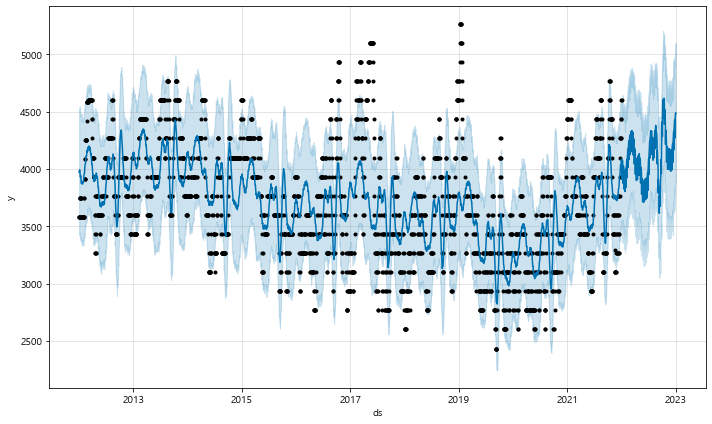

In [105]:
# 예측값 시각화
fig1 = m.plot(forecast)
# 검정색 점 : 실제 데이터 값
# 파란색 실선 : 예측값
# 하늘색 범위 : lower, upper 영역

In [106]:
# 한국 공휴일과 복날,조류독감 발생 반영

m = Prophet(holidays=holidays)
m.add_country_holidays(country_name = 'KR').fit(data)

future = m.make_future_dataframe(periods=365)

forcast = m.predict(future)
forecast.tail()
forecast.to_csv('./holidays반영_5_6호닭_prophet_예측값.csv')

13:49:01 - cmdstanpy - INFO - Chain [1] start processing
13:49:02 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m,initial='1095 days', period='180 days', horizon='30 days')
df_cv.head()

  0%|          | 0/15 [00:00<?, ?it/s]

13:49:04 - cmdstanpy - INFO - Chain [1] start processing
13:49:04 - cmdstanpy - INFO - Chain [1] done processing
13:49:05 - cmdstanpy - INFO - Chain [1] start processing
13:49:05 - cmdstanpy - INFO - Chain [1] done processing
13:49:06 - cmdstanpy - INFO - Chain [1] start processing
13:49:07 - cmdstanpy - INFO - Chain [1] done processing
13:49:07 - cmdstanpy - INFO - Chain [1] start processing
13:49:08 - cmdstanpy - INFO - Chain [1] done processing
13:49:09 - cmdstanpy - INFO - Chain [1] start processing
13:49:09 - cmdstanpy - INFO - Chain [1] done processing
13:49:10 - cmdstanpy - INFO - Chain [1] start processing
13:49:11 - cmdstanpy - INFO - Chain [1] done processing
13:49:12 - cmdstanpy - INFO - Chain [1] start processing
13:49:12 - cmdstanpy - INFO - Chain [1] done processing
13:49:13 - cmdstanpy - INFO - Chain [1] start processing
13:49:13 - cmdstanpy - INFO - Chain [1] done processing
13:49:14 - cmdstanpy - INFO - Chain [1] start processing
13:49:15 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-08,4011.866402,3661.035610,4307.677050,4267,2015-01-07
1,2015-01-09,4019.823357,3679.408144,4339.500539,4100,2015-01-07
2,2015-01-10,4008.114581,3701.544446,4314.315207,4100,2015-01-07
3,2015-01-12,3969.364269,3653.195824,4264.511246,4100,2015-01-07
4,2015-01-13,3959.358638,3628.498760,4298.257195,4100,2015-01-07


In [108]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,391008.380380,625.306629,502.764304,0.140376,0.151144,0.140161,0.550936
1,4 days,406614.359073,637.663202,526.533885,0.148916,0.152285,0.147526,0.513514
2,5 days,410059.507625,640.358890,522.422854,0.149813,0.152285,0.146819,0.567568
3,6 days,398418.054720,631.203656,503.479889,0.150168,0.148861,0.143845,0.554054
4,7 days,350344.667792,591.899204,464.692759,0.138669,0.136617,0.134011,0.584200
5,8 days,368728.417703,607.230119,467.143113,0.144518,0.123708,0.136969,0.582121
6,9 days,426261.949964,652.887395,493.112943,0.149175,0.105189,0.142526,0.604990
7,10 days,508431.622545,713.043913,544.795310,0.164948,0.117700,0.156253,0.621622
8,11 days,536429.231252,732.413293,571.507959,0.168936,0.126912,0.162762,0.594595
9,12 days,500313.299261,707.328283,564.687731,0.165683,0.135892,0.160148,0.594595
